# The Titanic Dataset
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
train_df = pd.read_csv('input/train.csv', header=0)
test_df = pd.read_csv('input/test.csv', header=0)
print('Training set consists of {} observations and {} features.'.format(train_df.shape[0], train_df.shape[1] - 1))
print('Test set consists of {} observations and {} features.'.format(test_df.shape[0], test_df.shape[1]))

Training set consists of 891 observations and 11 features.
Test set consists of 418 observations and 11 features.


In [3]:
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [4]:
total_df = train_df.append(test_df, ignore_index=True)
total_df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [5]:
total_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [6]:
total_df.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


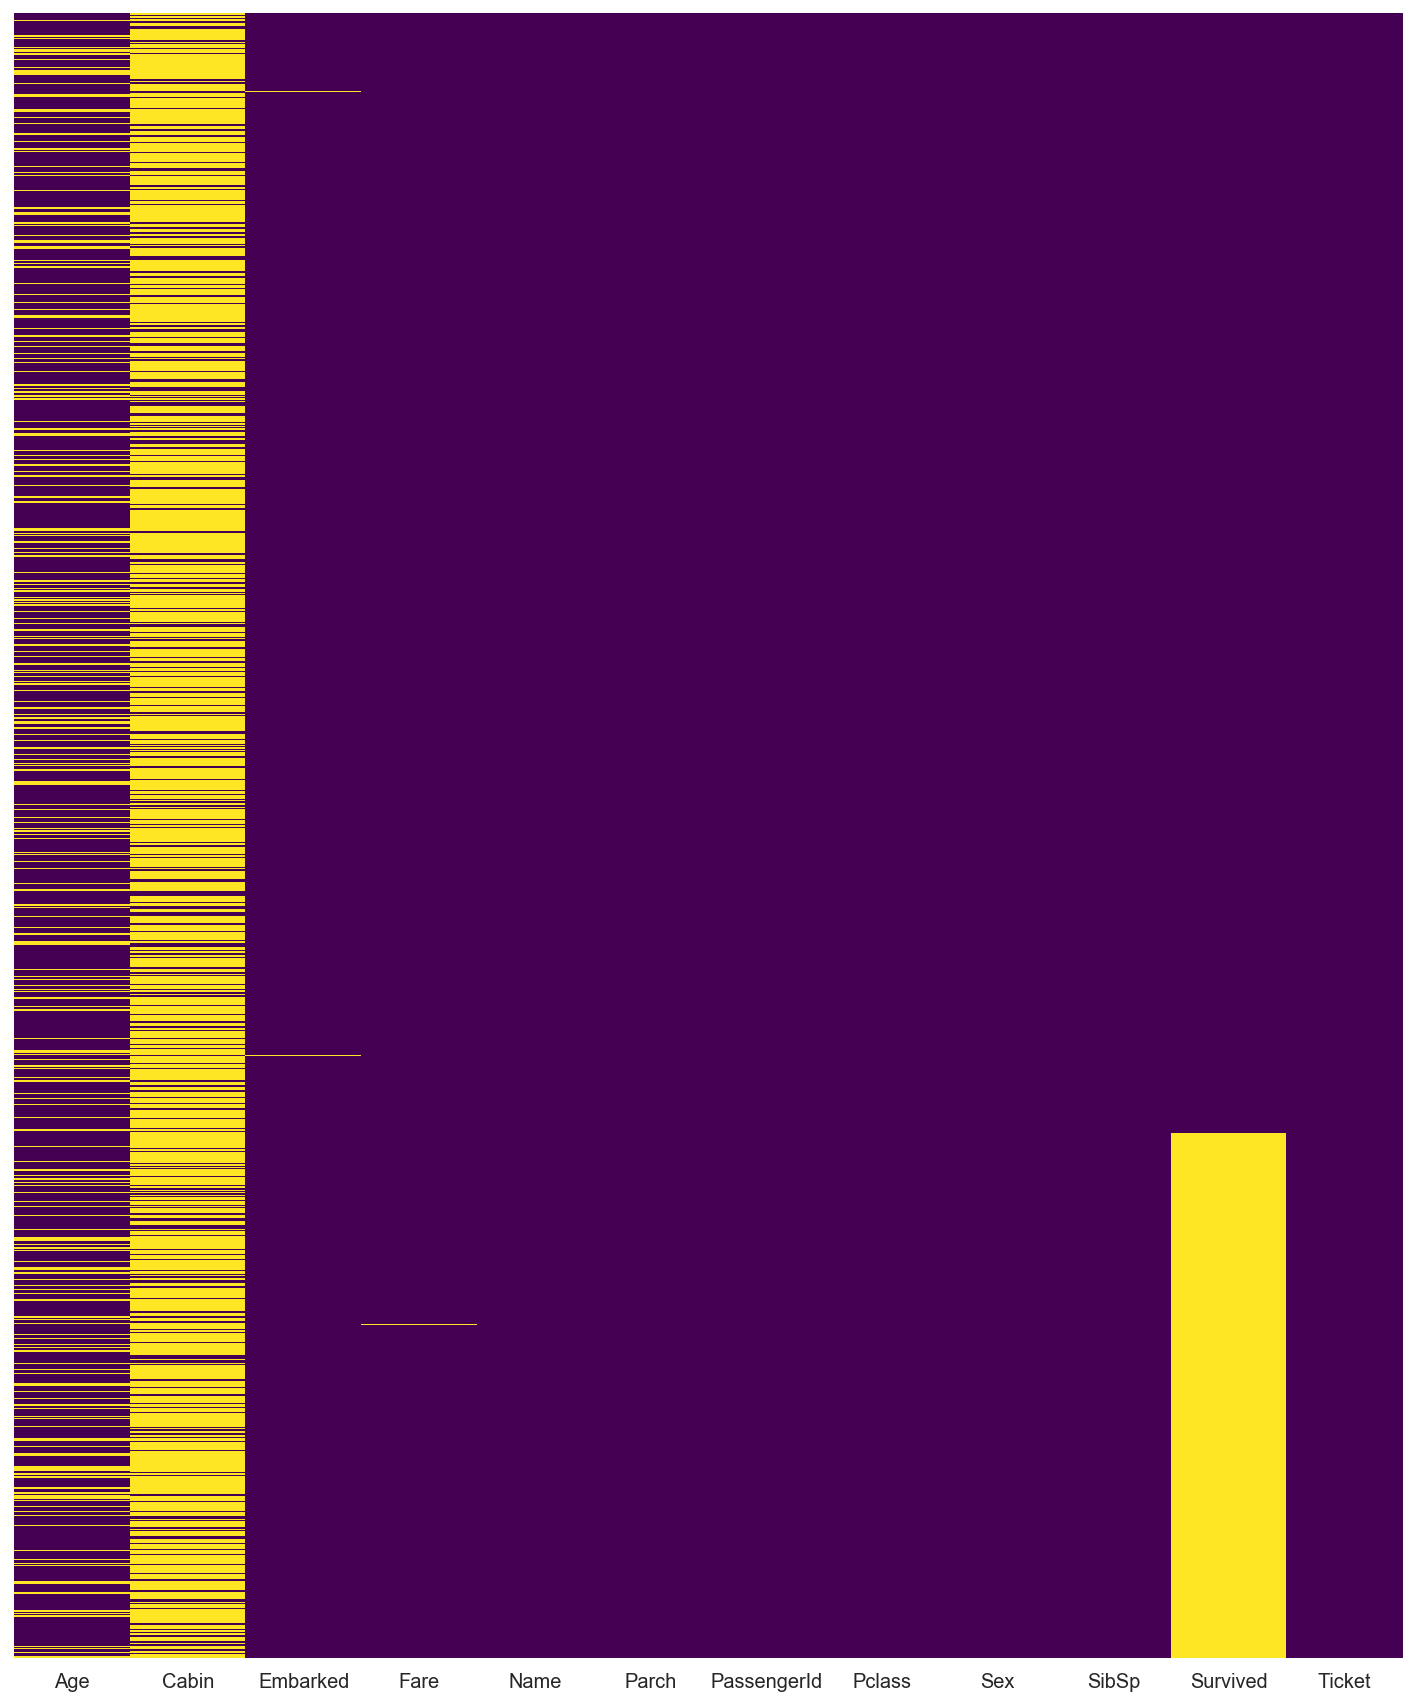

In [7]:
# Check for missing data
plt.figure(figsize=(10,12))
sns.heatmap(total_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.tight_layout()
# Missing some Age data and a lot of Cabin data

## Name
A person's **Name** is unlikely to have any influence but I will extract the title of each person.

In [8]:
total_df['Title'] = total_df['Name'].map(lambda n: n.split(',')[1].split('.')[0].strip())
total_df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Lady              1
Don               1
the Countess      1
Jonkheer          1
Mme               1
Capt              1
Dona              1
Sir               1
Name: Title, dtype: int64

I will change the strange titles or agglomerate the ones that are not frequent. Create title _'Mil'_ for military related personnel.

In [9]:
# Aggregate less common titles into main ones
Title_Dictionary = {
                    "Capt": "Mil",
                    "Col": "Mil",
                    "Don": "Mr",
                    "Dona": "Mrs",
                    "Dr": "Dr",
                    "Jonkheer": "Mr",
                    "Lady": "Mrs",
                    "Major": "Mil",
                    "Master": "Master",
                    "Miss": "Miss",
                    "Mlle": "Miss",
                    "Mme": "Mrs",
                    "Mr": "Mr",
                    "Mrs": "Mrs",
                    "Ms": "Miss",
                    "Rev": "Rev",
                    "Sir": "Mr",
                    "the Countess": "Mrs"
                    }
total_df['Title'] = total_df['Title'].map(Title_Dictionary)
total_df['Title'].value_counts()

Mr        760
Miss      264
Mrs       201
Master     61
Rev         8
Dr          8
Mil         7
Name: Title, dtype: int64

Encode variable **Title**. Take care with dummy variable trap: remove one column.

In [10]:
title_df = pd.get_dummies(total_df['Title'], prefix='Title', drop_first=True)
title_df.head()

,Title_Master,Title_Mil,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


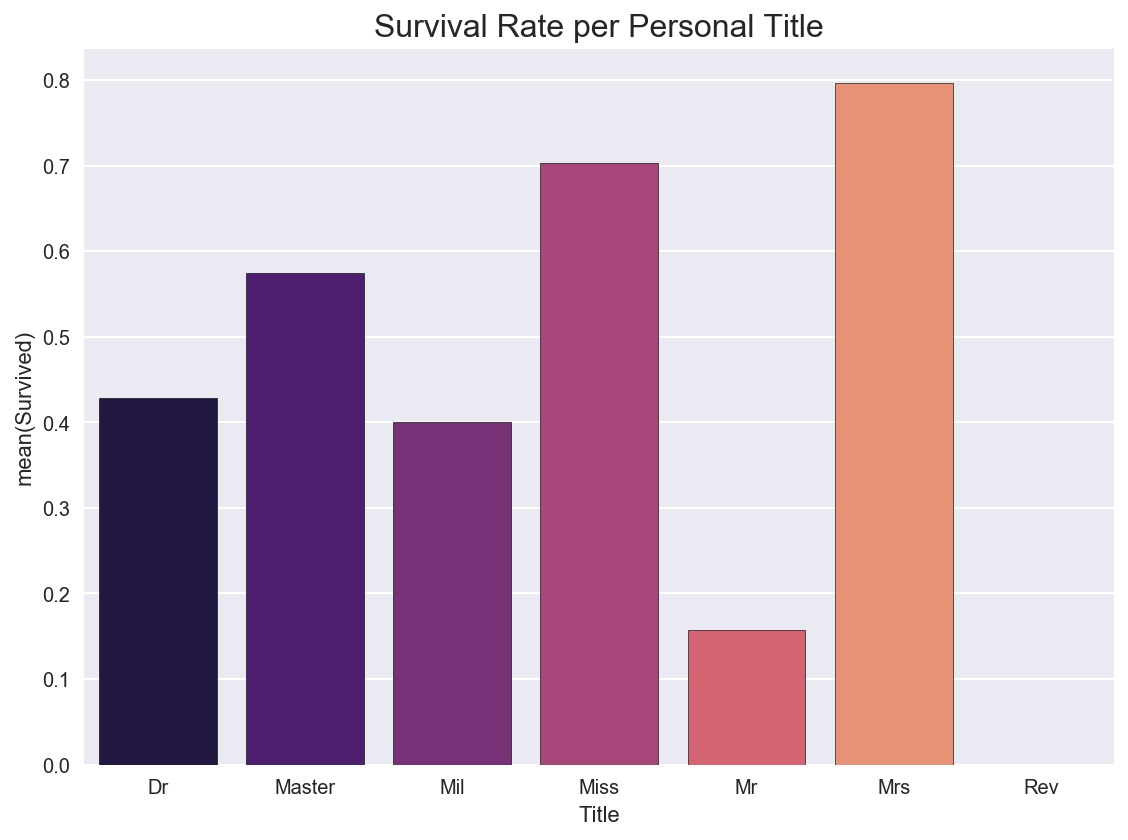

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x=total_df.groupby('Title').Survived.mean().index, 
            y=total_df.groupby('Title').Survived.mean(), 
            palette='magma')
plt.title('Survival Rate per Personal Title', fontsize=16)
plt.tight_layout()

In [91]:
from scipy.stats import f_oneway
_, p_value = f_oneway(
             train_df[total_df['Title'] == 'Dr']['Survived'], 
             train_df[total_df['Title'] == 'Master']['Survived'],
             train_df[total_df['Title'] == 'Mil']['Survived'],
             train_df[total_df['Title'] == 'Miss']['Survived'],
             train_df[total_df['Title'] == 'Mr']['Survived'],
             train_df[total_df['Title'] == 'Mrs']['Survived'],
             train_df[total_df['Title'] == 'Rev']['Survived'])
print('The p-value of the difference of the variable Survived in relation with \
Title is:\n{}'.format(p_value))

The p-value of the difference of the variable Survived in relation with Title is:
1.191650789013299e-73


/Users/hugobmachado/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hugobmachado/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hugobmachado/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/hugobmachado/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/hugobmachado/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/hugobmachado/anaconda/lib/python3.6/site-packages/ipykernel

Create the variable **Surname** that can be used later to aggregate family names.

In [77]:
total_df['Surname'] = total_df['Name'].map(lambda n: n.split(',')[0].strip())
total_df['Surname'].value_counts().head(10)

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
Ford          6
Fortune       6
Carter        6
Rice          6
Smith         6
Name: Surname, dtype: int64

## Sex

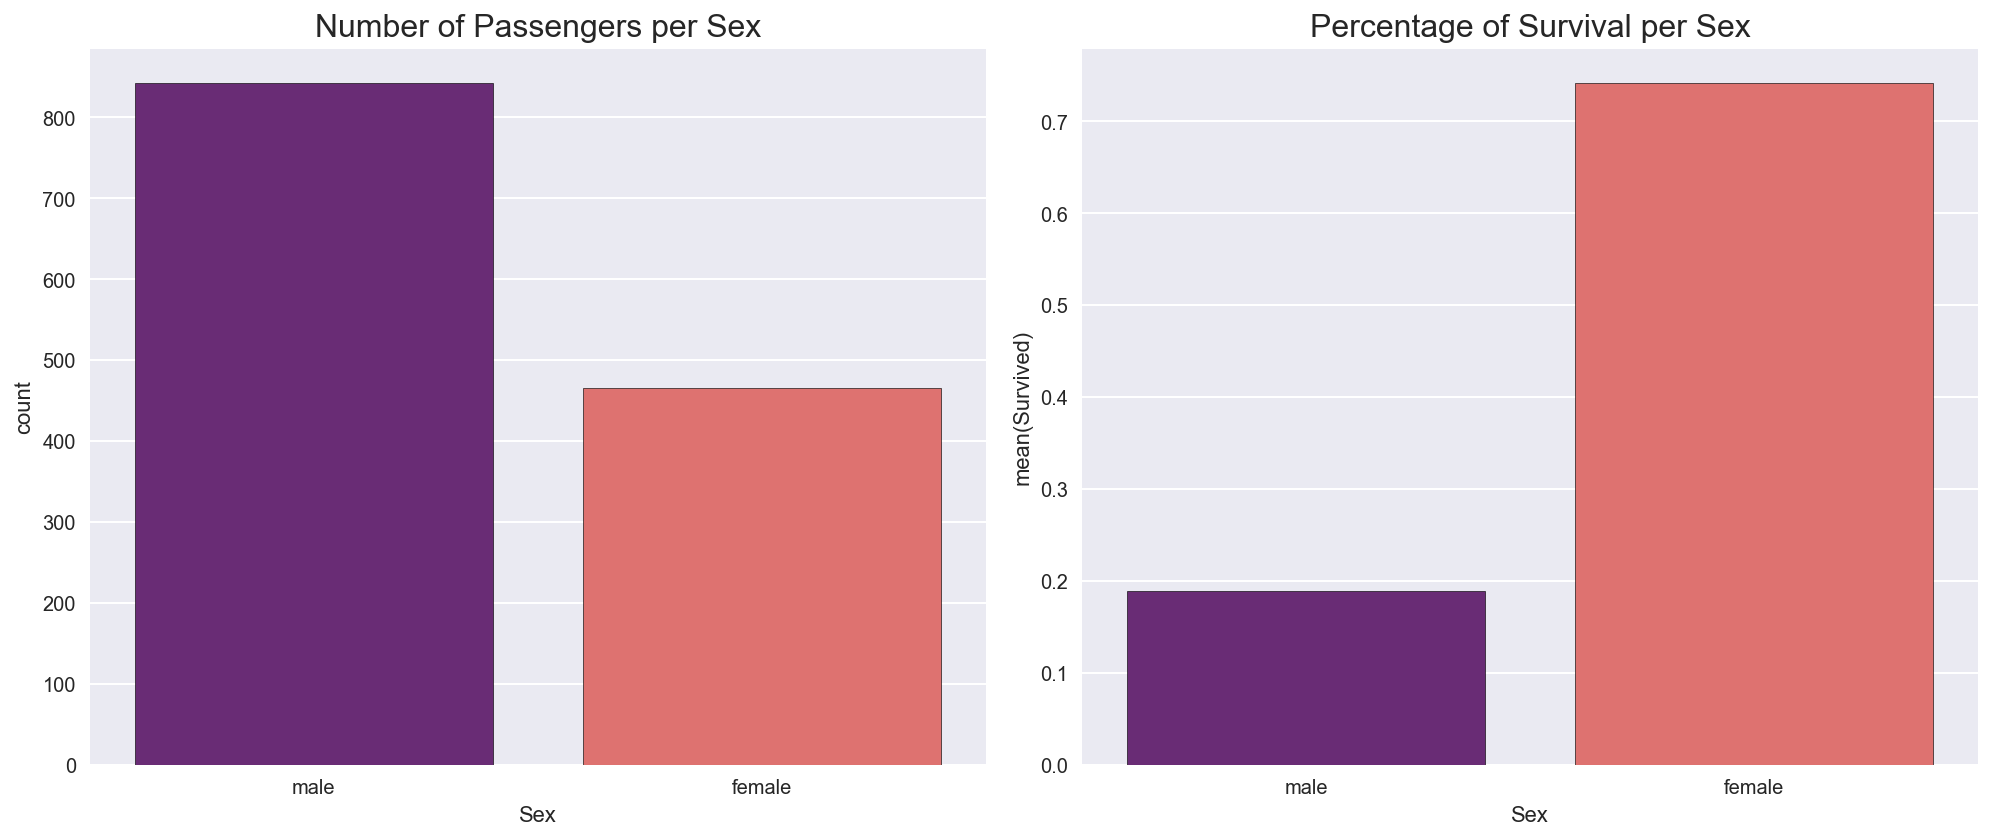

In [14]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.countplot(total_df['Sex'], palette='magma')
plt.title('Number of Passengers per Sex', fontsize=16)

plt.subplot(122)
sns.barplot(x='Sex', y='Survived', data=train_df, estimator=np.mean, palette='magma', ci=None)
plt.title('Percentage of Survival per Sex', fontsize=16)
plt.tight_layout()

Almost twice as many man were present in the boat than women but their total survival rate is below 20%, while over 70% of women survived.

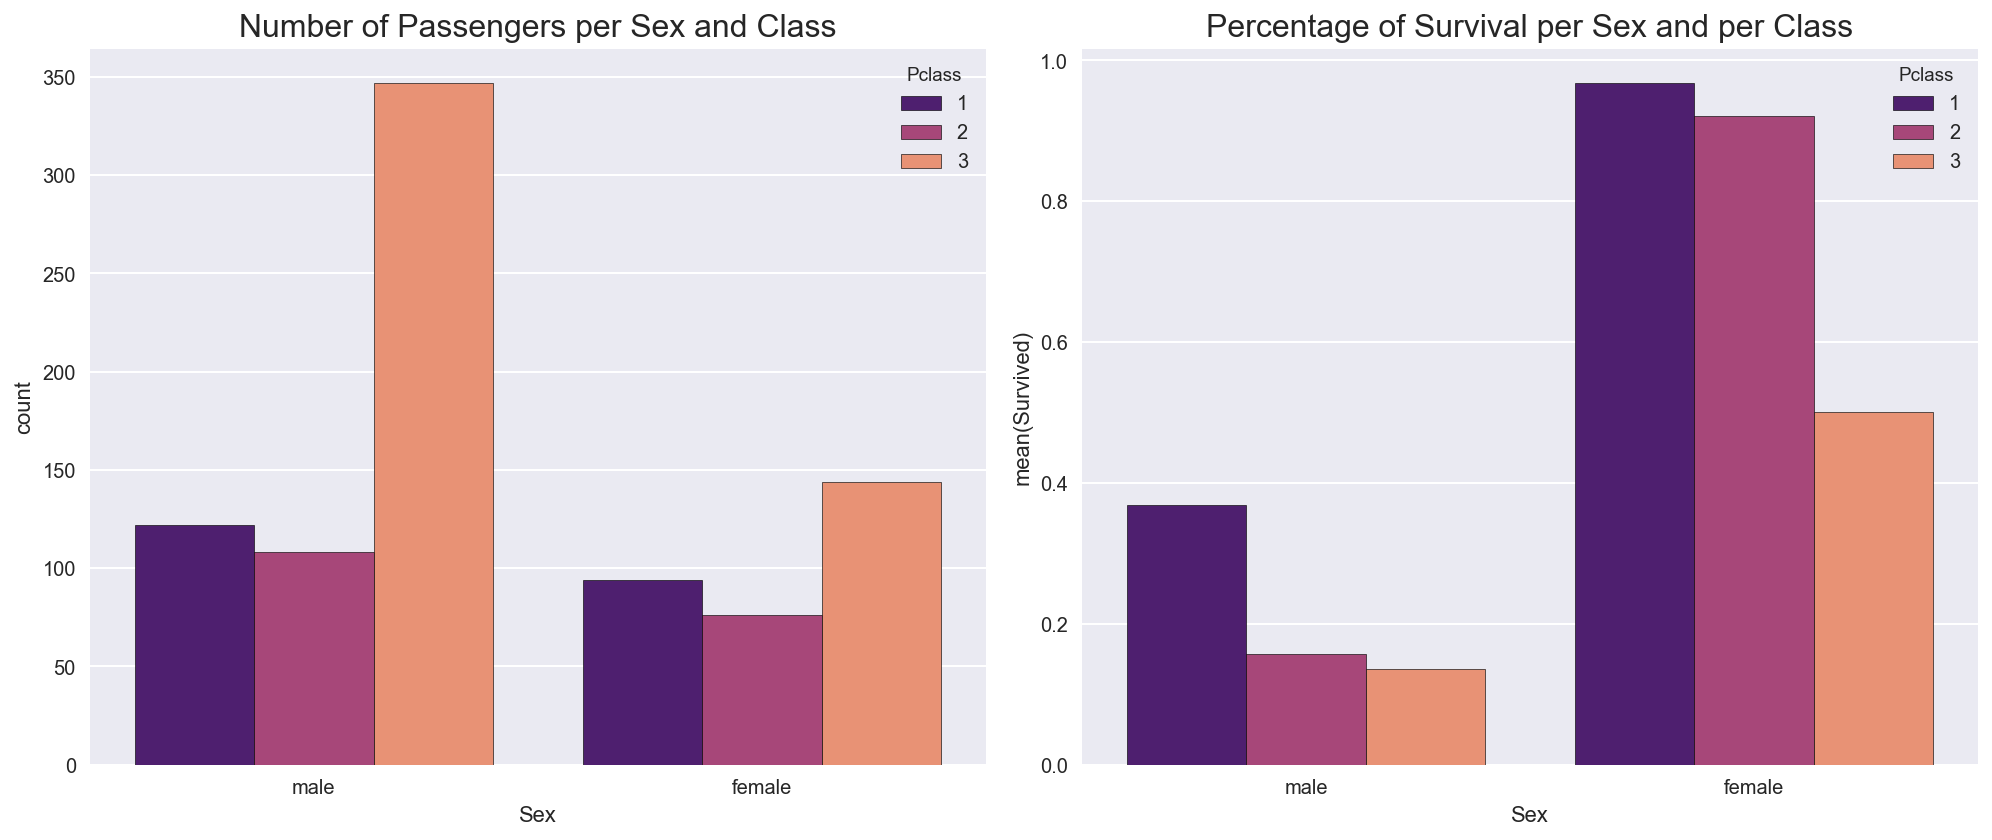

In [15]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.countplot(x='Sex', hue='Pclass', data=train_df, palette='magma')
plt.title('Number of Passengers per Sex and Class', fontsize=16)

plt.subplot(122)
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_df, palette='magma', ci=None)
plt.title('Percentage of Survival per Sex and per Class', fontsize=16)
plt.tight_layout()

Most men were in third class, while the higher the class the higher the chance of survival. Highest for women in first and second class at above 90%. Smallest for men in third and second class, below 20%.

Encode **Sex** column. Take care of dummy variable trap: remove one column.

In [18]:
sex_df = pd.get_dummies(total_df['Sex'], prefix='Sex', drop_first=True)
sex_df.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


## Family Onboard

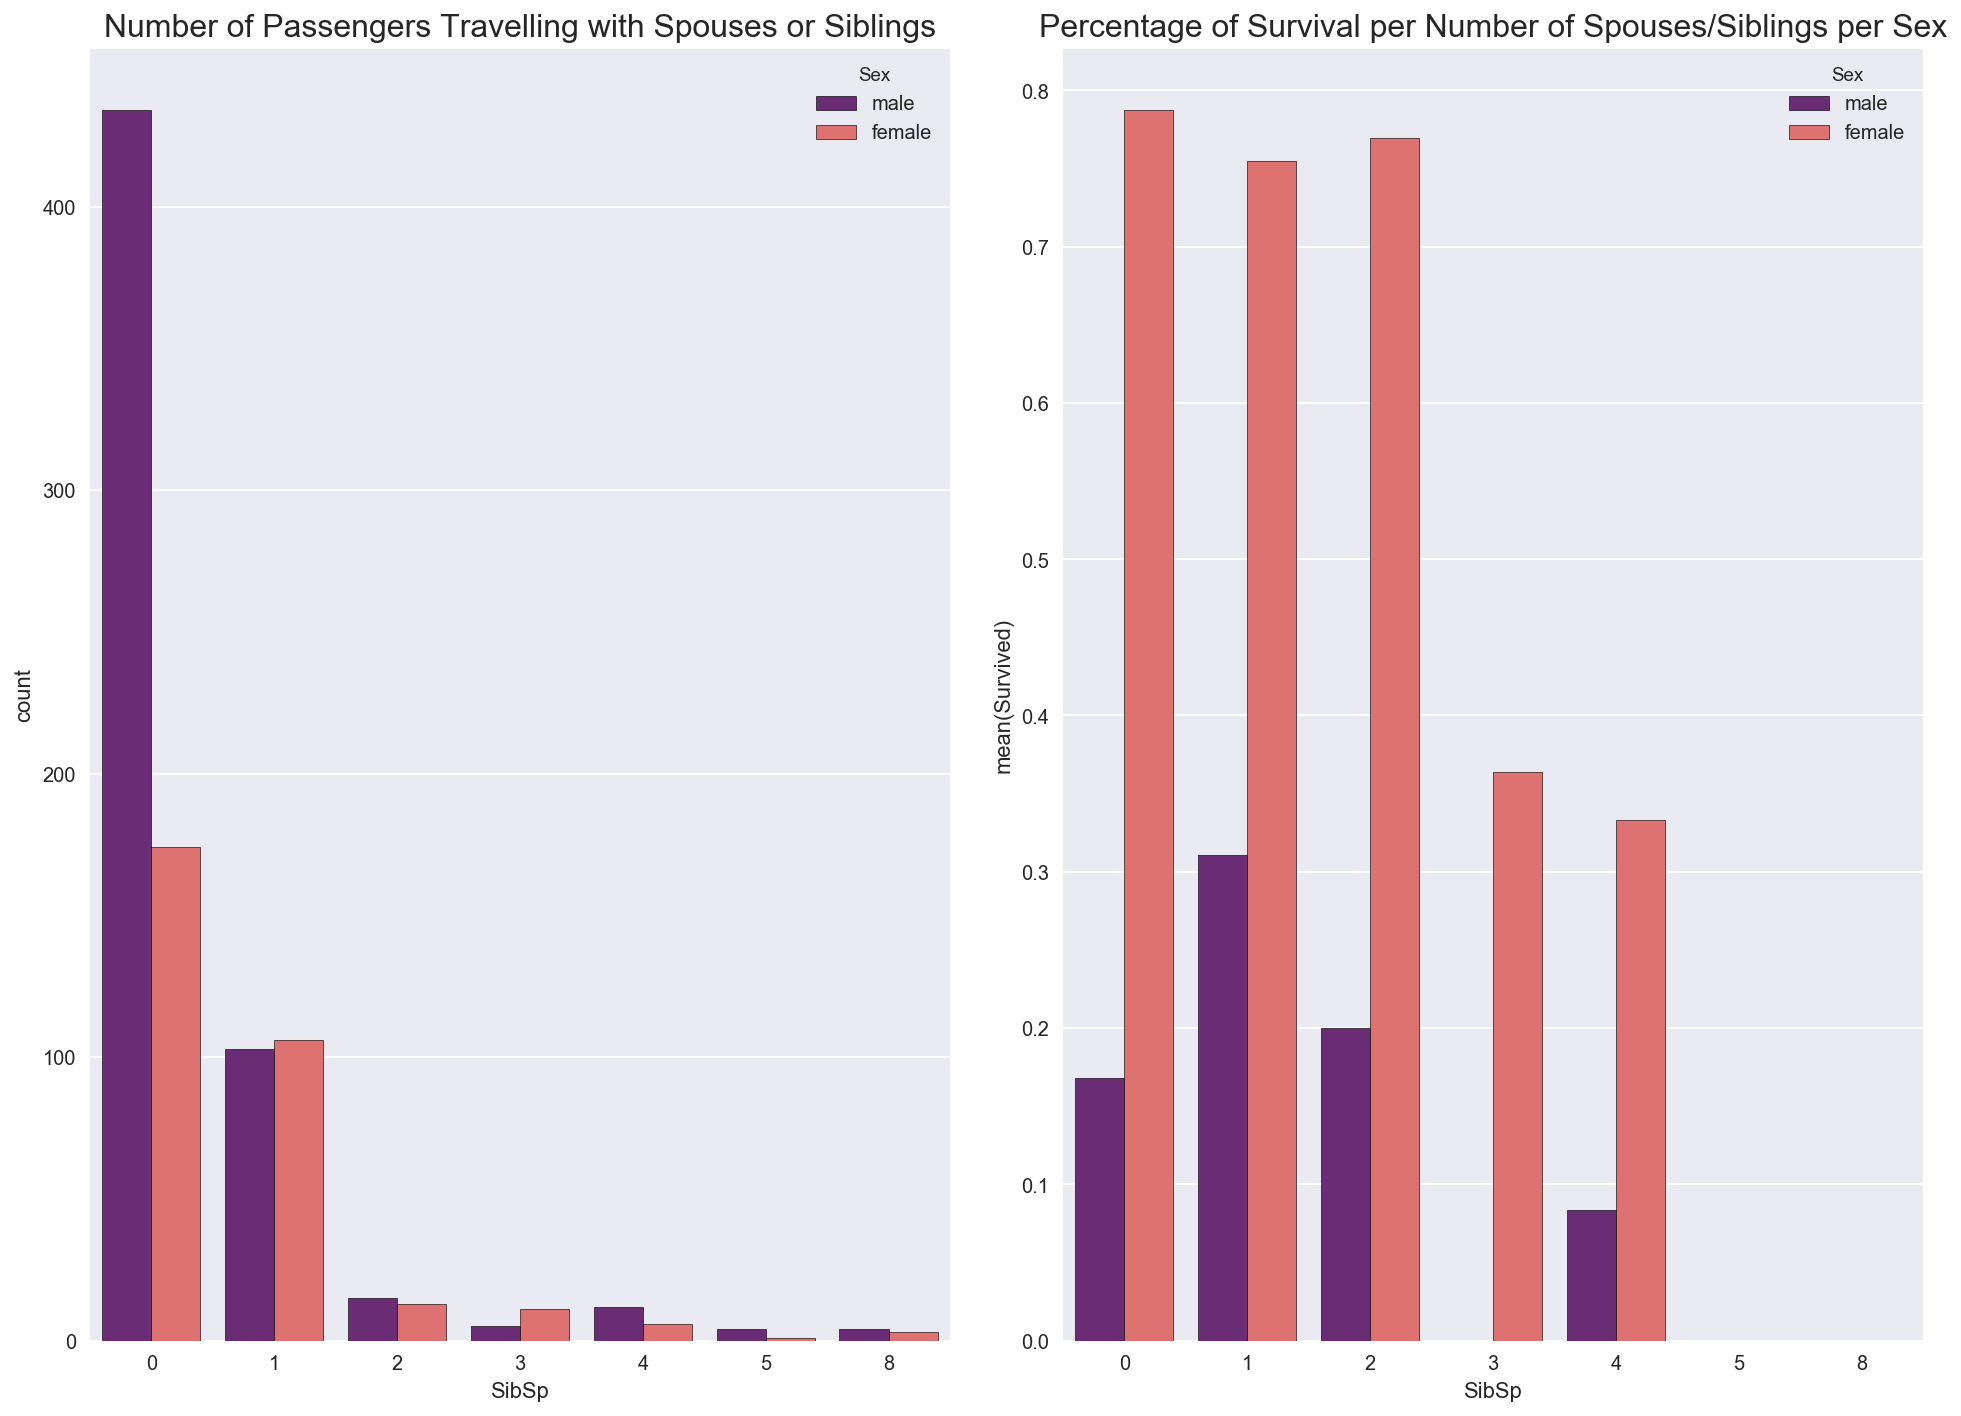

In [19]:
plt.figure(figsize=(14,10))
plt.subplot(121)
sns.countplot(x='SibSp', hue='Sex', data=train_df, palette='magma')
plt.title('Number of Passengers Travelling with Spouses or Siblings', fontsize=16)

plt.subplot(122)
sns.barplot(x='SibSp', y='Survived', hue='Sex', data=train_df, palette='magma', ci=None)
plt.title('Percentage of Survival per Number of Spouses/Siblings per Sex', fontsize=16)
plt.tight_layout()

plt.tight_layout()

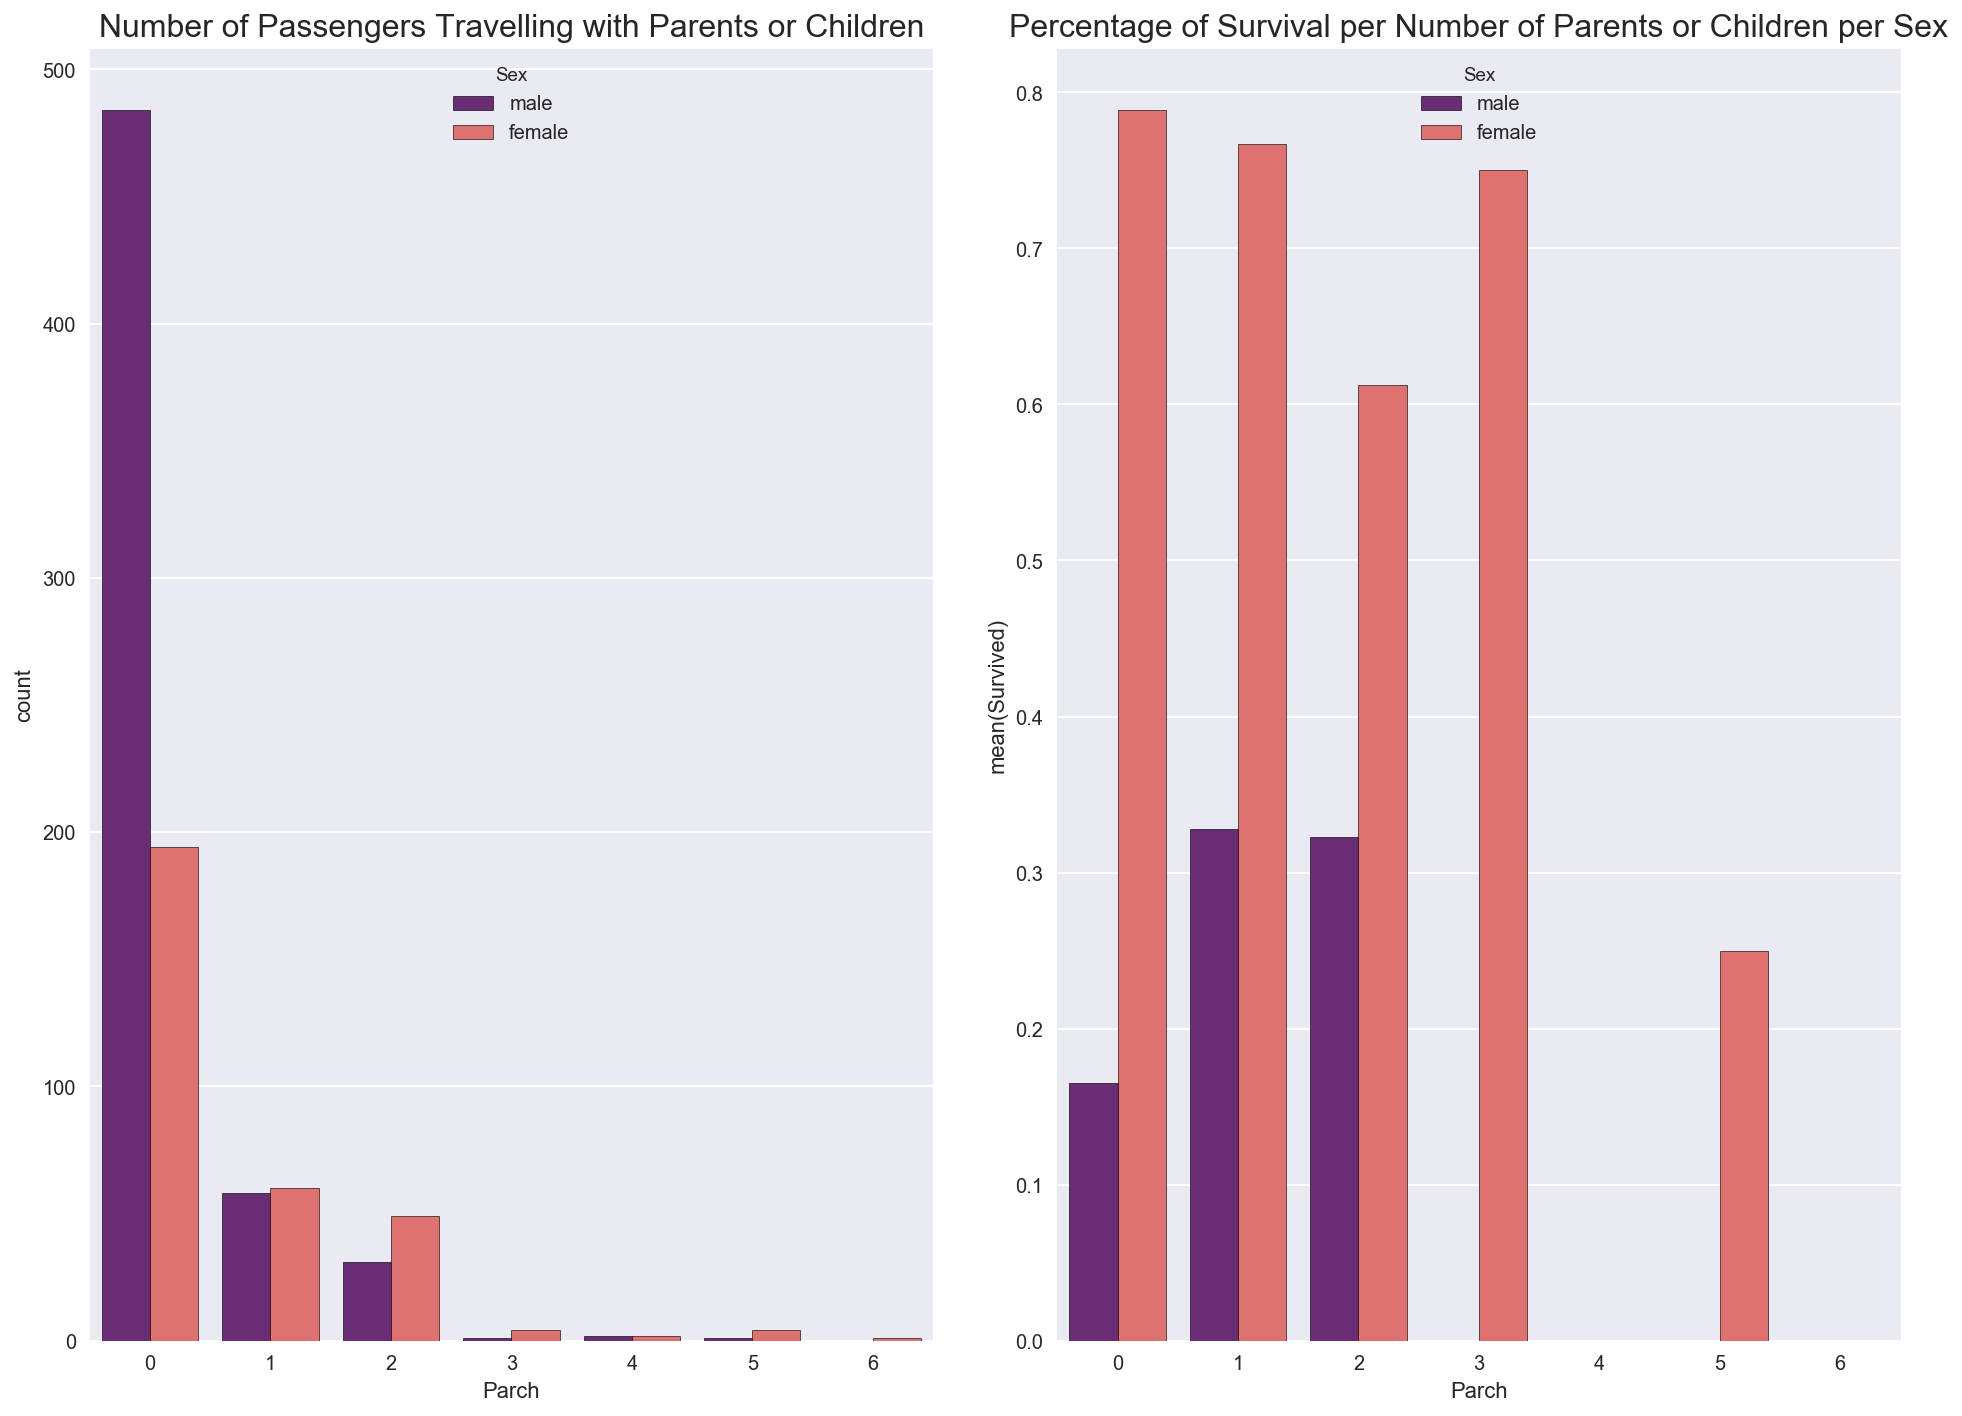

In [20]:
plt.figure(figsize=(14,10))
plt.subplot(121)
sns.countplot(x='Parch', hue='Sex', data=train_df, palette='magma')
plt.title('Number of Passengers Travelling with Parents or Children', fontsize=16)

plt.subplot(122)
sns.barplot(x='Parch', y='Survived', hue='Sex', data=train_df, palette='magma', ci=None)
plt.title('Percentage of Survival per Number of Parents or Children per Sex', fontsize=16)
plt.tight_layout()

plt.tight_layout()

Will create a new feature referring to total family size travelling together that is the sum of features SibSp and Parch plus the passenger.

In [21]:
# Family Size: SibSp + Parch + the passenger itself
total_df['Family_Size'] = total_df['SibSp'] + total_df['Parch'] + 1

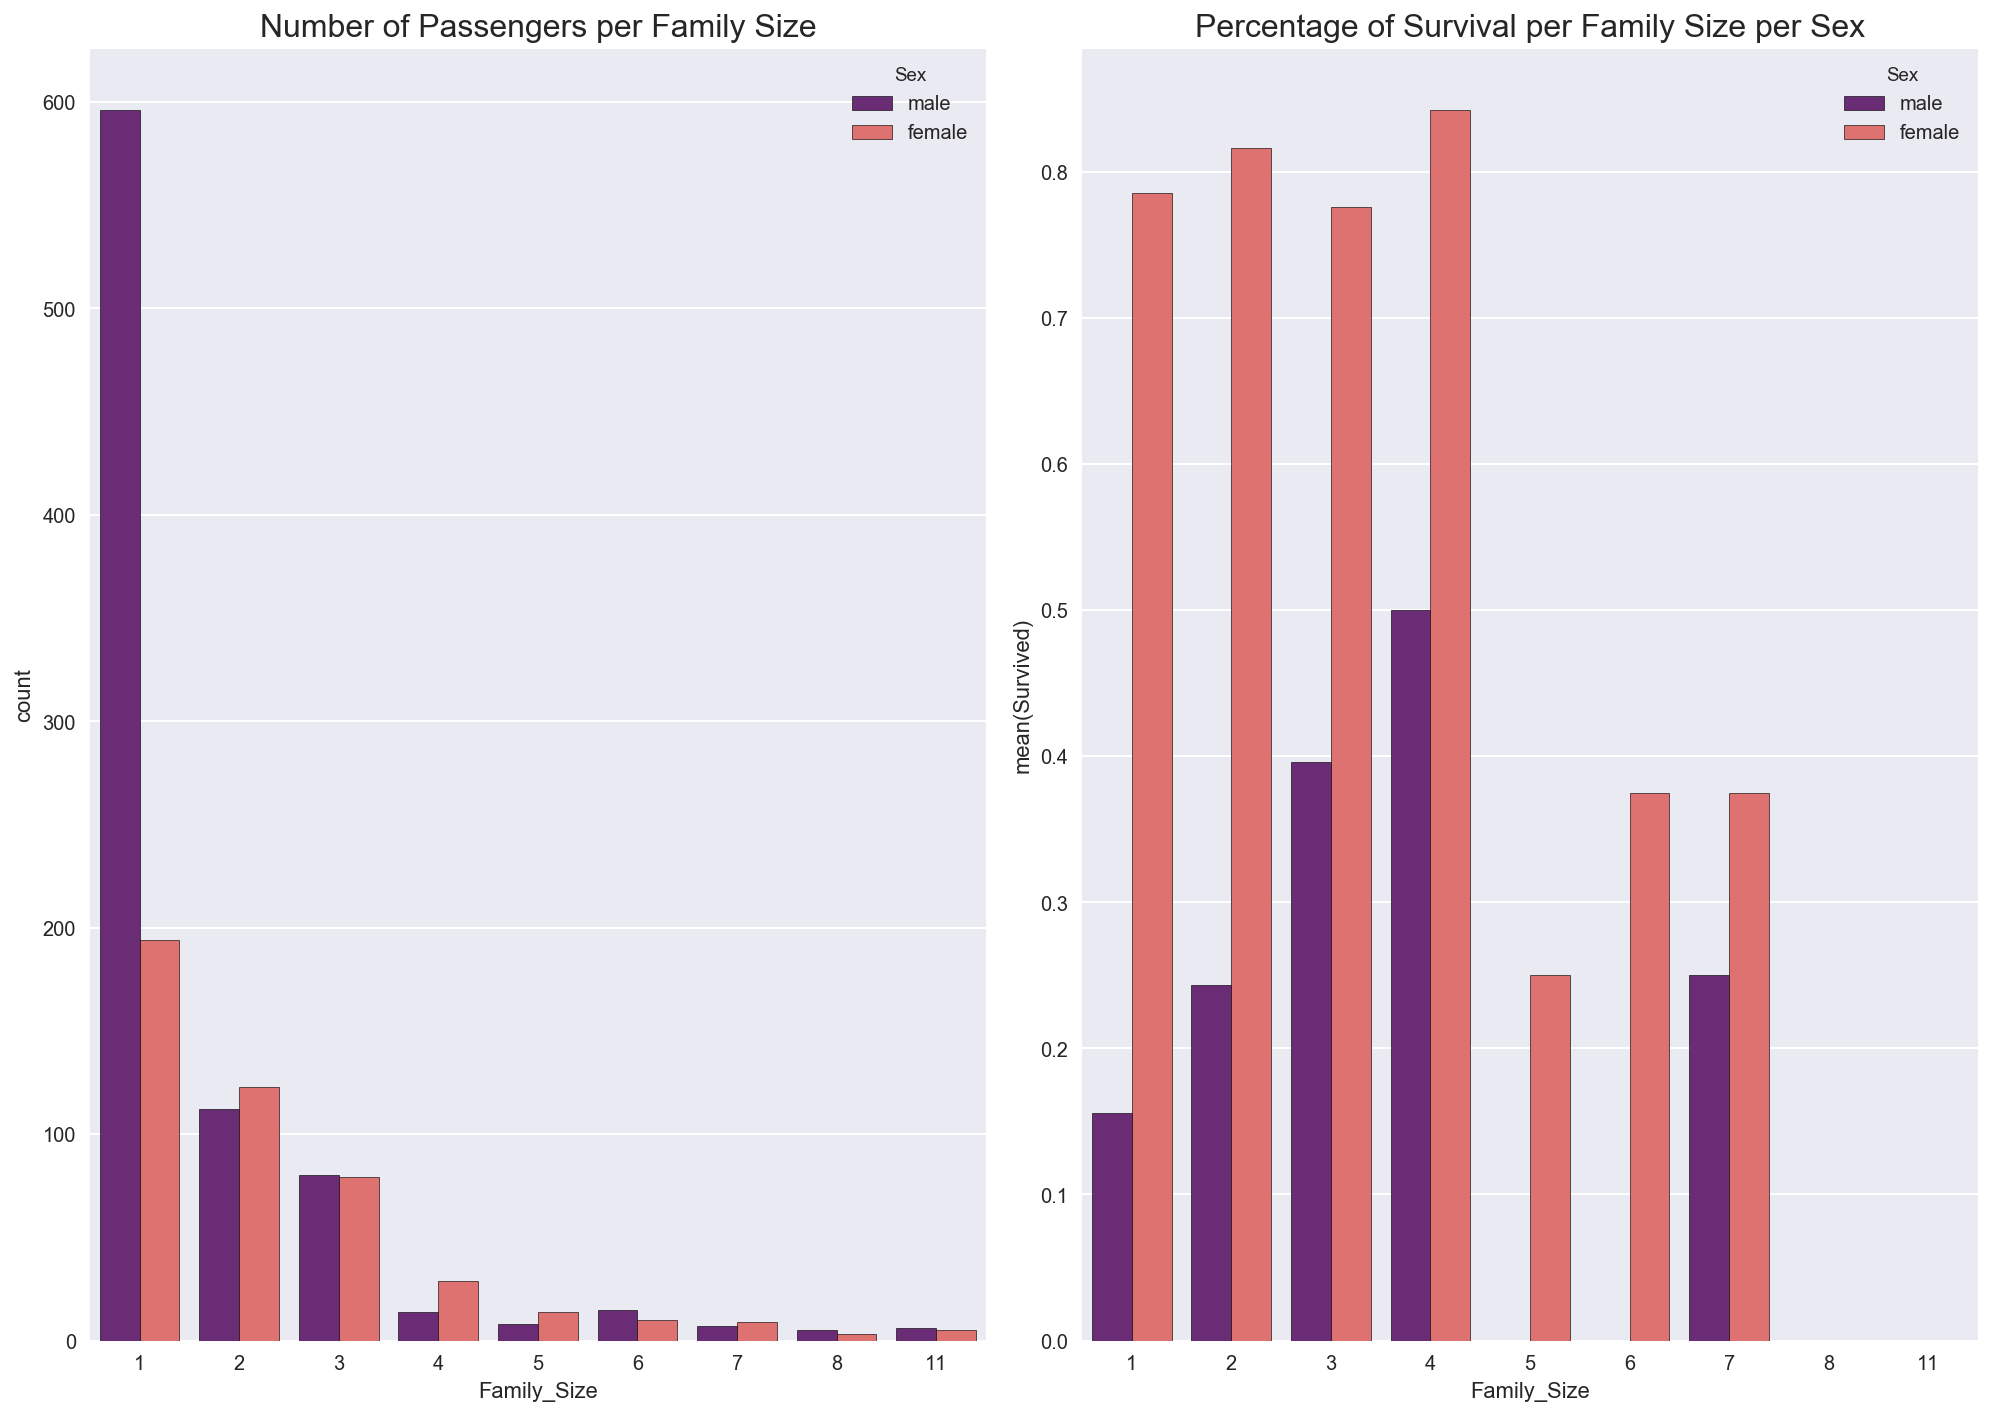

In [22]:
plt.figure(figsize=(14,10))
plt.subplot(121)
sns.countplot(x='Family_Size', hue='Sex', data=total_df, palette='magma')
plt.title('Number of Passengers per Family Size', fontsize=16)

plt.subplot(122)
sns.barplot(x='Family_Size', y='Survived', hue='Sex', data=total_df, palette='magma', ci=None)
plt.title('Percentage of Survival per Family Size per Sex', fontsize=16)
plt.tight_layout()

plt.tight_layout()

Most men are travelling alone. Survival rate for men increases considerably with family size until 4, after it drops.

Will create new _Family ID_ feature which concatenates number of members of a family with Surname. Large families may have had difficulties sticking together, and maybe some families more than others?

First I convert Family Size to string and concatenate it with Surname.

In [23]:
total_df['Family_ID'] = total_df['Family_Size'].map(str) + total_df['Surname']

Families of two shouldn't have had a major problem staying together, and the problem doesn't apply to those travelling alone so we set the variable to _Small_ for those groups.

In [24]:
total_df.loc[(total_df['Family_Size'] <= 2), 'Family_ID'] = 'Small'

Still some families of two persist in the dataset. Need to create new dataframe to remove them.

In [25]:
family_df = pd.DataFrame(dict(Family_ID=total_df['Family_ID'].value_counts().index,
                              freq=total_df['Family_ID'].value_counts().values))
family_df = family_df[family_df['freq'] <= 2]

total_df['Family_ID'] = total_df['Family_ID'].map(
    lambda f: f if not f in family_df['Family_ID'].values else 'Small')

In [26]:
family_df = pd.get_dummies(total_df['Family_ID'], drop_first=True)
family_df.head()

,11Sage,3Abbott,3Boulos,3Bourke,3Brown,3Caldwell,3Collyer,3Compton,3Coutts,3Crosby,3Danbom,3Davies,3Dodge,3Drew,3Elias,3Goldsmith,3Hart,3Hickman,3Johnson,3Klasen,3Mallet,3McCoy,3Moubarek,3Nakid,3Navratil,3Peacock,3Peter,3Quick,3Rosblom,3Samaan,3Sandstrom,3Spedden,3Taussig,3Thayer,3Touma,3Van Impe,3Wells,3Wick,3Widener,3van Billiard,4Allison,4Baclini,4Becker,4Carter,4Dean,4Herman,4Johnston,4Laroche,4West,5Ford,5Lefebre,5Palsson,5Ryerson,6Fortune,6Panula,6Rice,6Skoog,7Andersson,7Asplund,8Goodwin,Small
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Success! No more families with less than 3 members in the dataset.

## Embarkation Point
The proportion of Deceased seems to be biased towards people that embarked in Southampton. The majority of the people that embarked in Cherbourg survived.

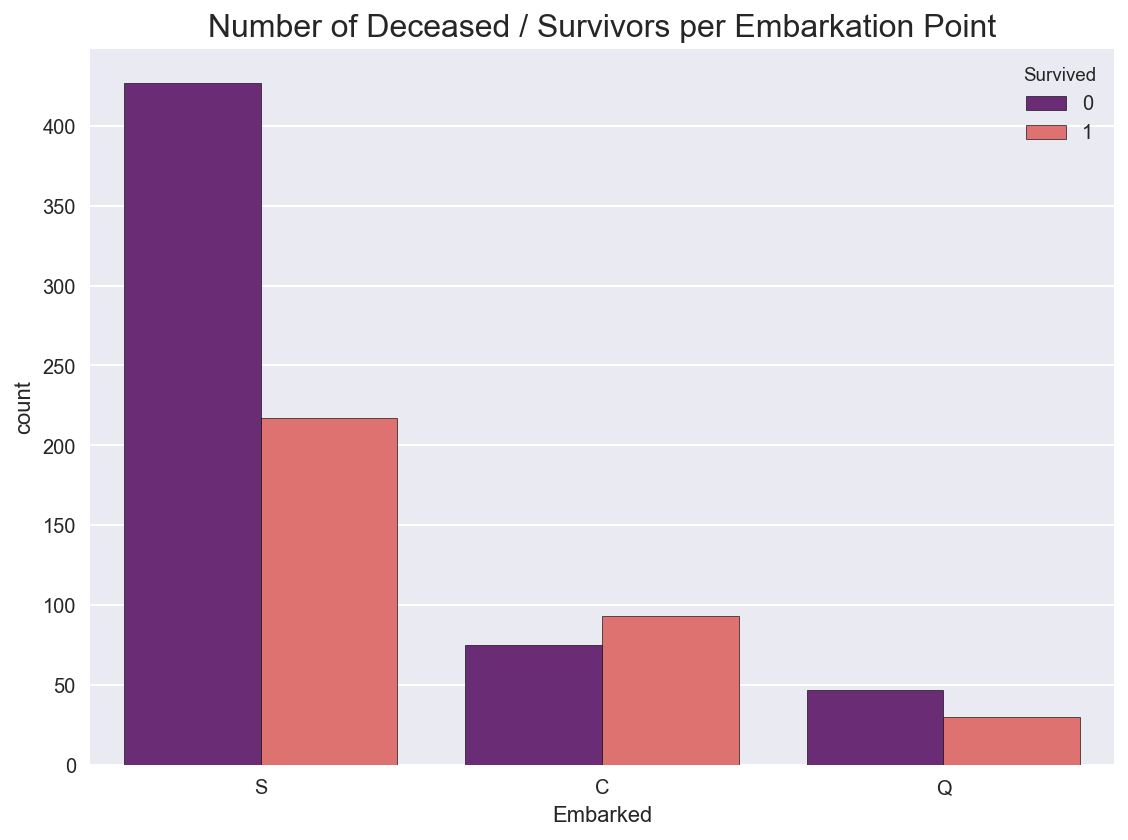

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', hue='Survived', data=train_df, palette='magma')
plt.title('Number of Deceased / Survivors per Embarkation Point', fontsize=16)
plt.tight_layout()

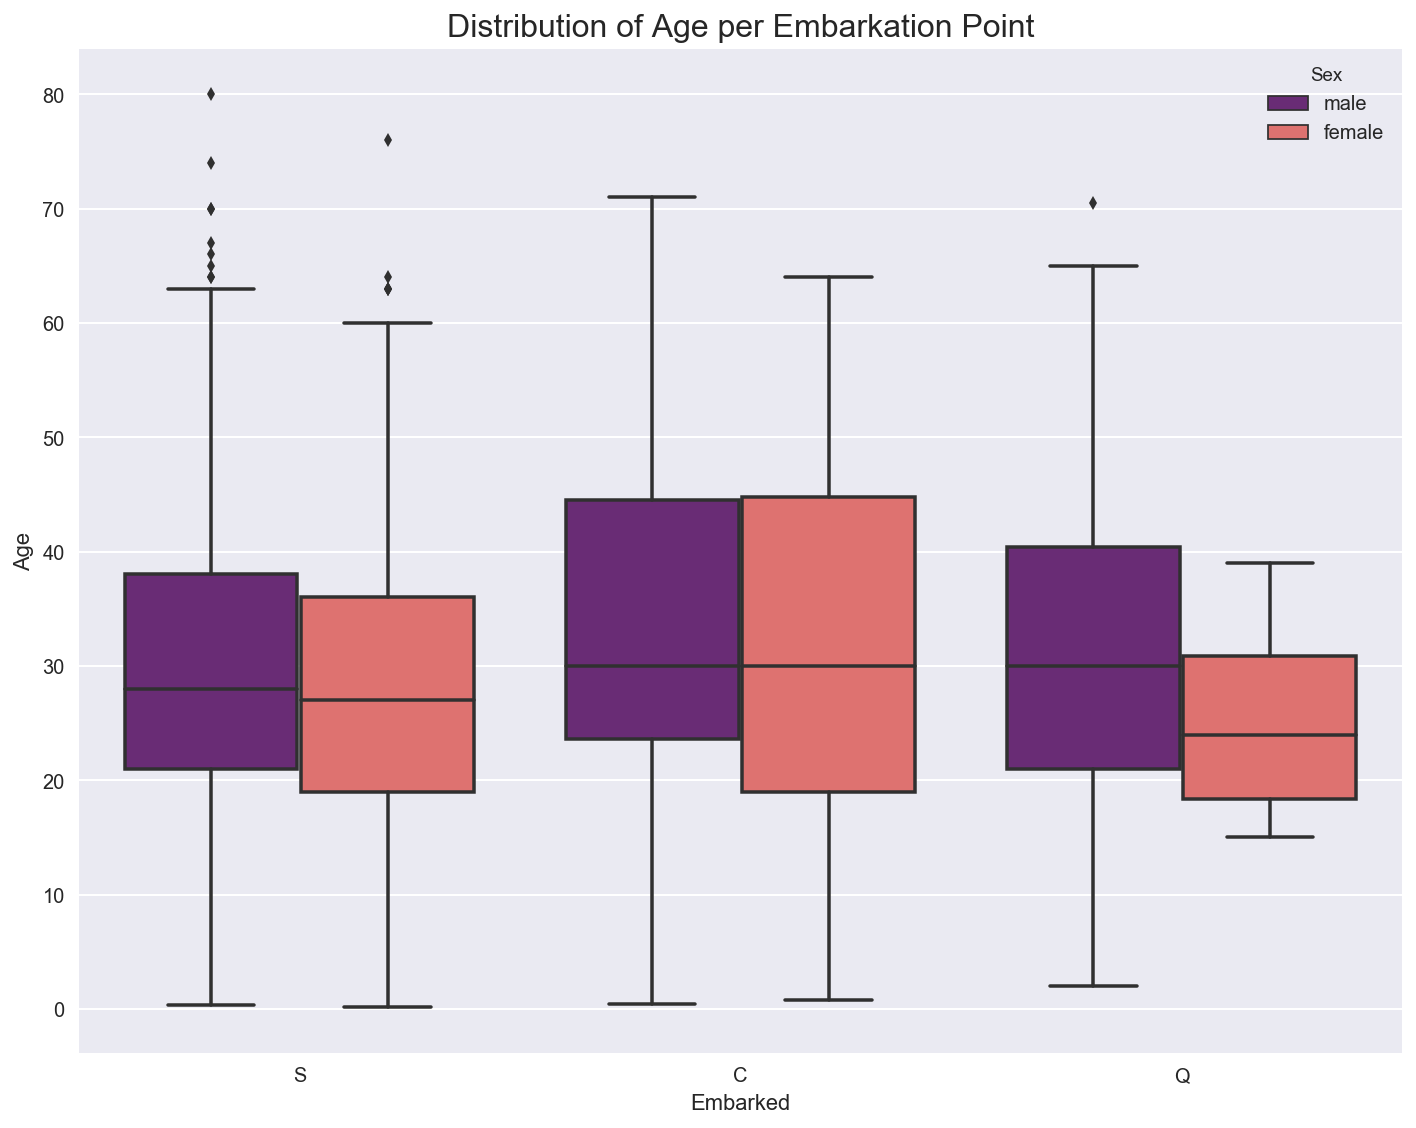

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Embarked', y='Age', hue='Sex', data=total_df, palette='magma')
plt.title('Distribution of Age per Embarkation Point', fontsize=16)
plt.tight_layout()

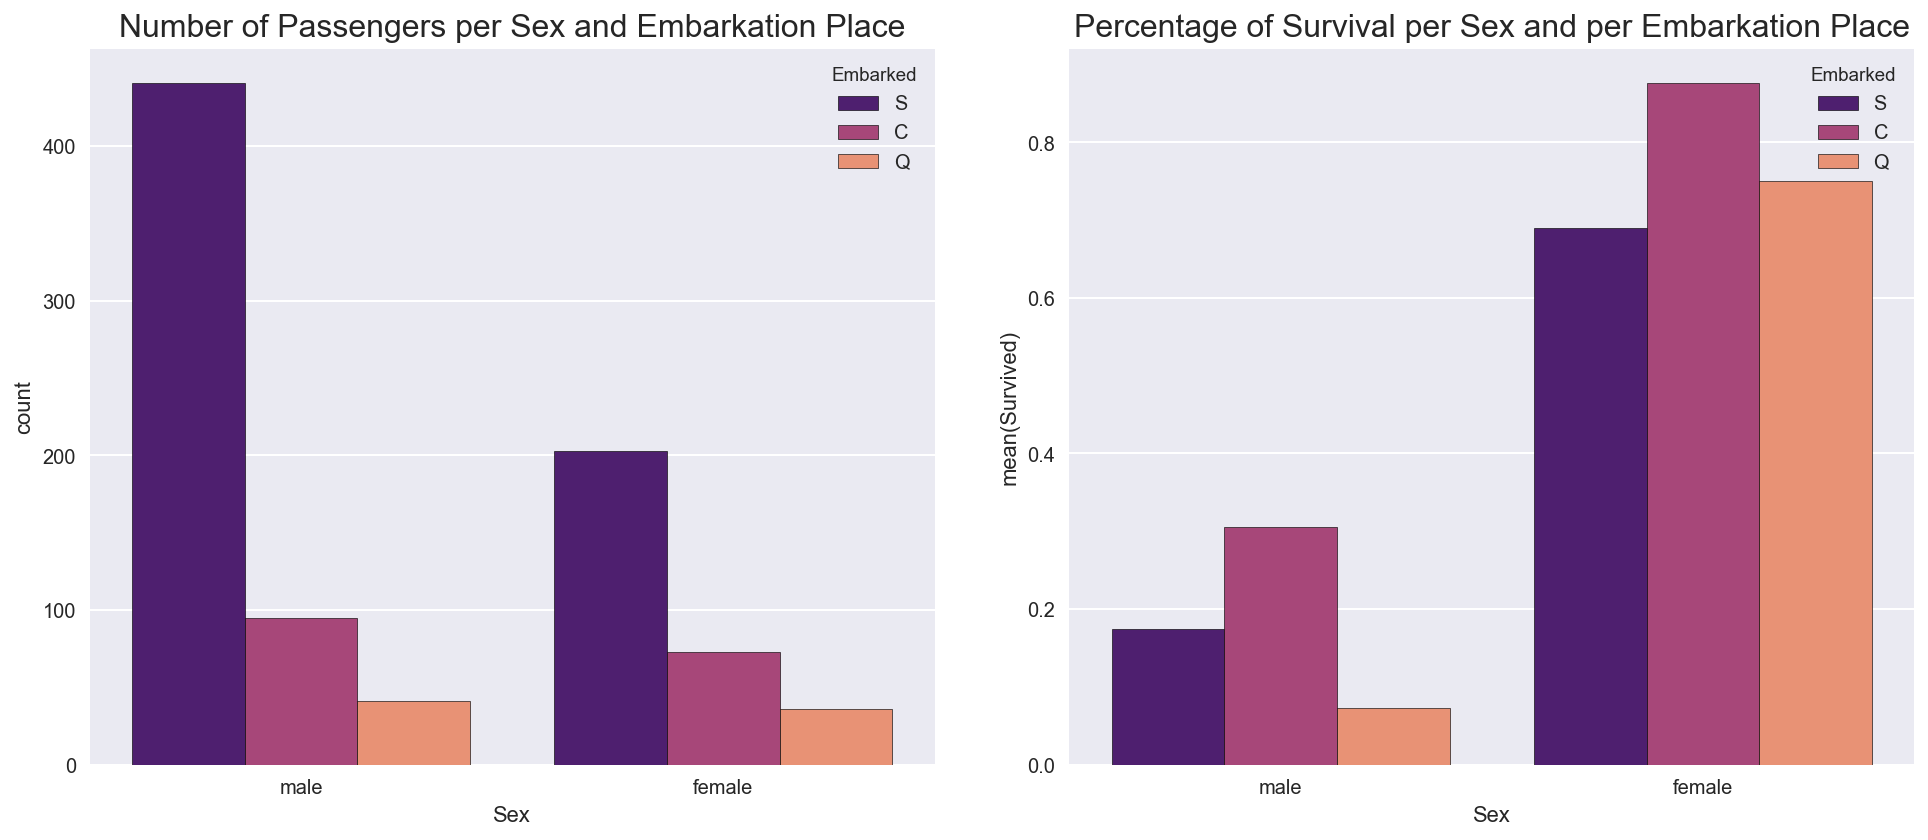

In [16]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.countplot(x='Sex', hue='Embarked', data=train_df, palette='magma')
plt.title('Number of Passengers per Sex and Embarkation Place', fontsize=16)

plt.subplot(122)
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=train_df, palette='magma', ci=None)
plt.title('Percentage of Survival per Sex and per Embarkation Place', fontsize=16)
plt.tight_layout()

Most passengers embarked in Southampton, especially males. Passengers that embarked in Cherbourg had a distinctly higher chance of survival. Will check if that is significant with ANOVA.

In [94]:
_, p_value = f_oneway(train_df[train_df['Embarked'] == 'C']['Survived'], 
                      train_df[train_df['Embarked'] == 'S']['Survived'],
                      train_df[train_df['Embarked'] == 'Q']['Survived'])
print('The p-value of the difference of the variable Survived in relation with \
Embarkation Point is:\n{}'.format(p_value))

The p-value of the difference of the variable Survived in relation with Embarkation Point is:
1.514339014290716e-06


**p-value of t-test is < 0.001 so it is a highly significative difference.** Definitely worth pursuing.

Two female passengers are missing Fare Embarkation Place. Both had fares of 80$.

In [29]:
total_df[total_df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Surname,Family_Size,Family_ID
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,Icard,1,Small
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,Stone,1,Small


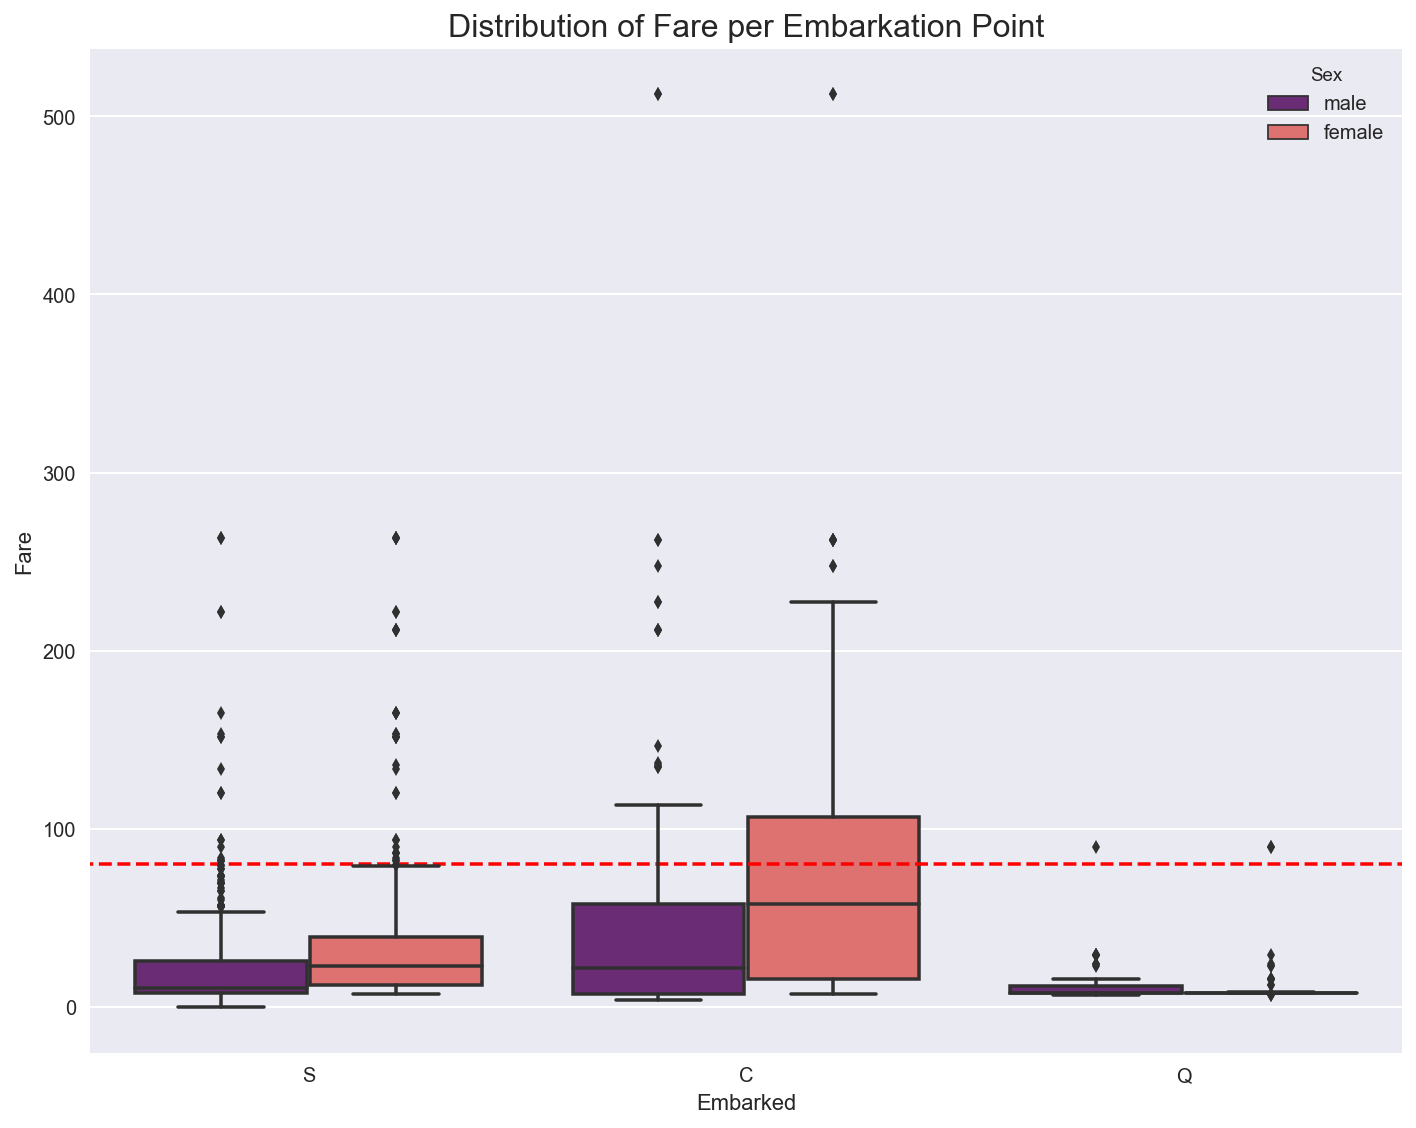

In [30]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Embarked', y='Fare', hue='Sex', data=total_df, palette='magma')
plt.title('Distribution of Fare per Embarkation Point', fontsize=16)
plt.hlines(y=80, xmin=-100, xmax=100, colors='red', linestyles='--')
plt.tight_layout()

The most expensive fares were from people that embarked in Cherbourg.

Looking at the graph is seems more likely they embarked in Cherbourg. So I'm going to assign their embarkation point there.

In [31]:
total_df['Embarked'].fillna(value='C', inplace=True)

Encode **Embarked** variable. Take care of dummy variable trap.

In [32]:
embarked_df = pd.get_dummies(total_df['Embarked'], prefix='Embarked', drop_first=True)
embarked_df.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


## Pclass
Encode Pclass variable. Take care of dummy variable trap.

In [33]:
pclass_df = pd.get_dummies(total_df['Pclass'], prefix='Pclass', drop_first=True)
pclass_df.head()

,Pclass_2,Pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


## Fare
Fare has a massive difference in scale, could benefit from a square root or log transform.

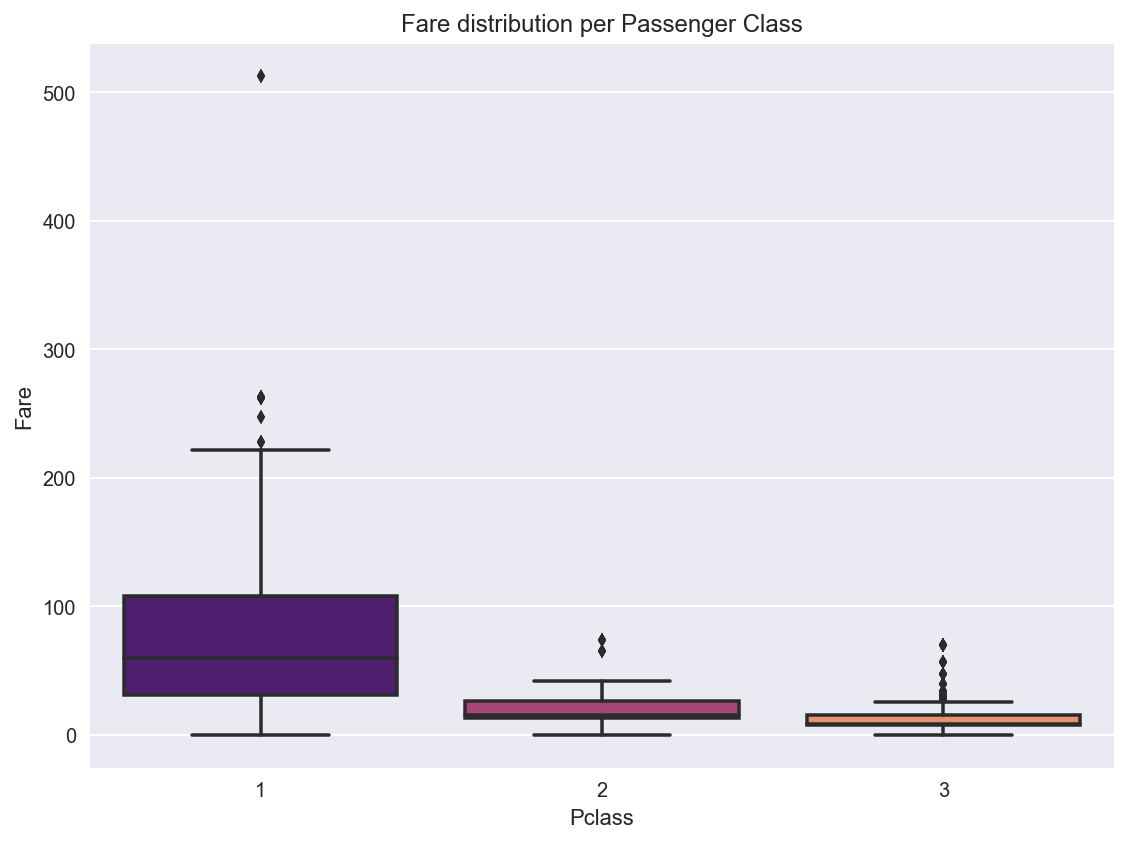

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=total_df, palette='magma')
plt.title('Fare distribution per Passenger Class')
plt.tight_layout()

Will divide the fare into quartiles to see influence on Survival Rate.

In [35]:
fare_qcut, bins = pd.qcut(train_df['Fare'], 
                          [0., .25, .5, .75, 1.], 
                          labels=['q1', 'q2', 'q3', 'q4'], 
                          retbins=True)
qcut_df = pd.DataFrame(fare_qcut)
qcut_df['Survived'] = train_df['Survived']

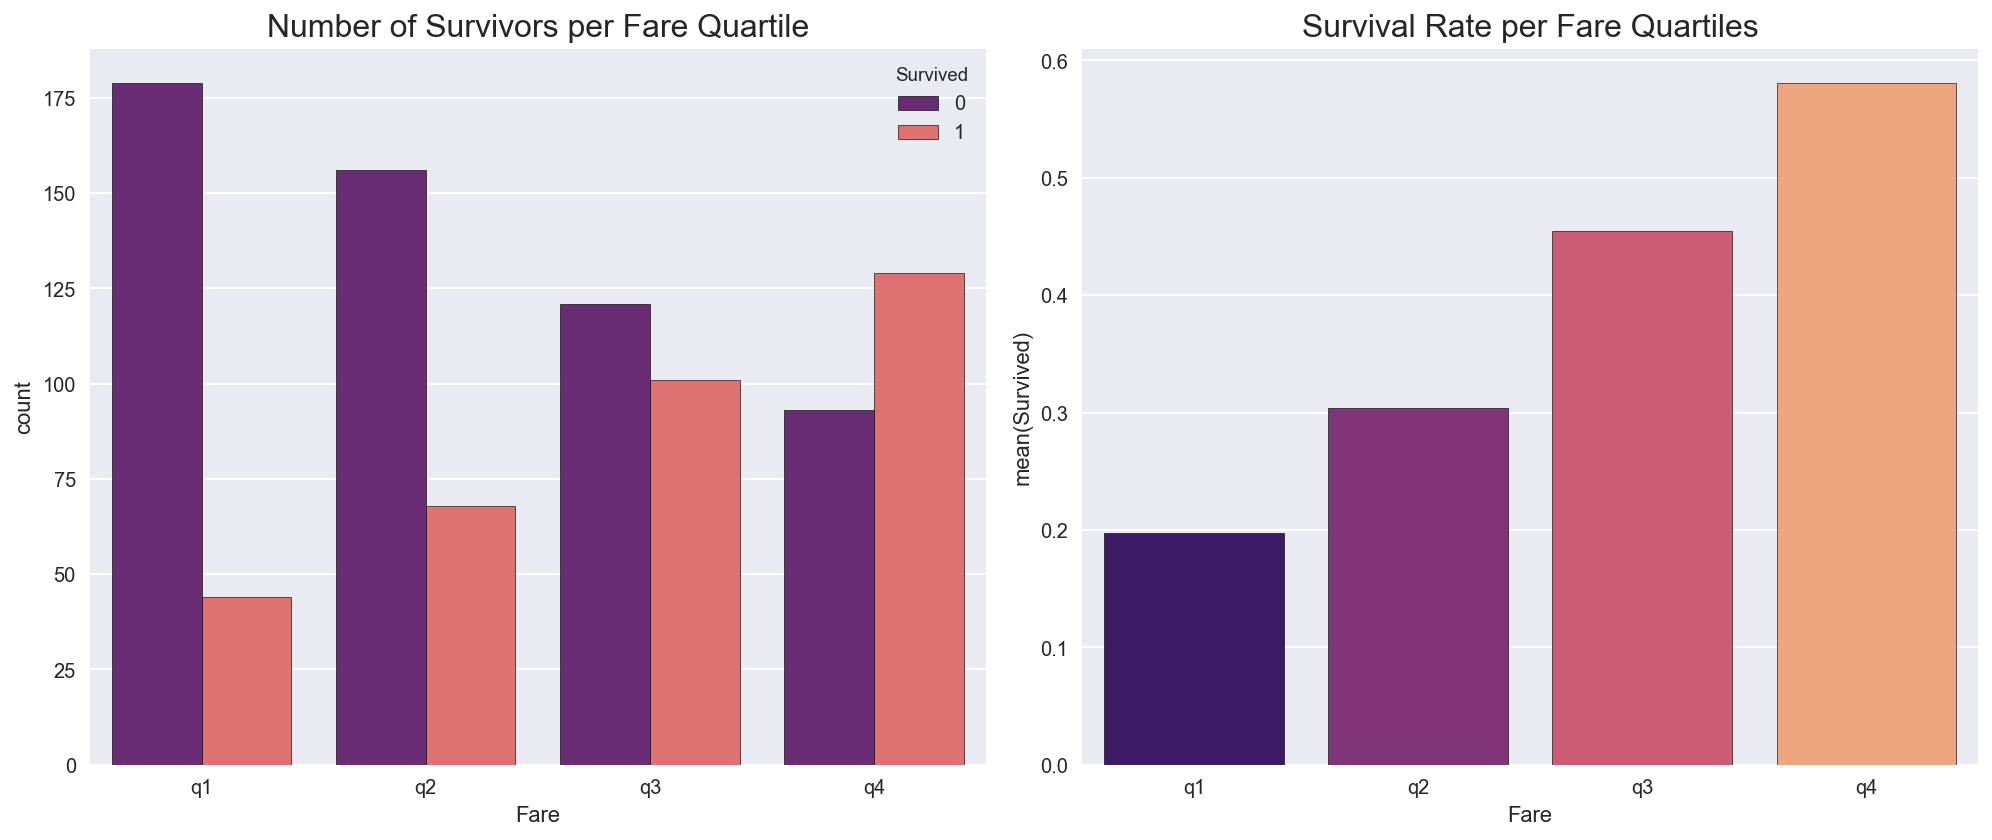

In [36]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot(x='Fare', hue='Survived', data=qcut_df, palette='magma')
plt.title('Number of Survivors per Fare Quartile', fontsize=16)

plt.subplot(122)
sns.barplot(x='Fare', y='Survived', data=qcut_df, ci=None, palette='magma')
plt.title('Survival Rate per Fare Quartiles', fontsize=16)
plt.tight_layout()

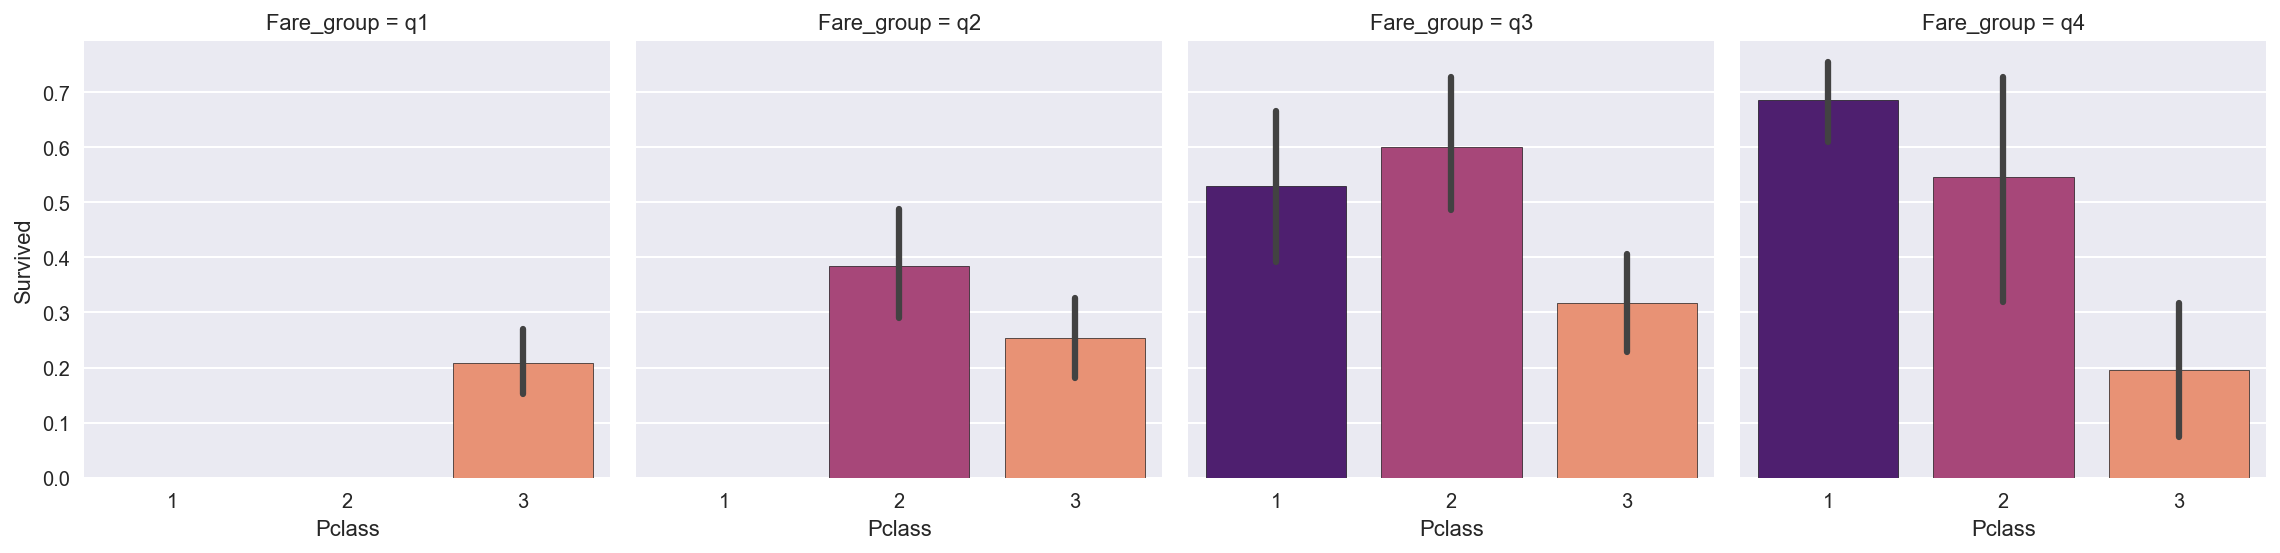

In [37]:
train_df["Fare_group"] = qcut_df['Fare']
sns.factorplot(x="Pclass", y="Survived",
              col="Fare_group", data=train_df, kind="bar", palette='magma')
plt.tight_layout()

If there was some doubt about people that paid more expensive tickets surviving this graph shows it all. Also most men were on cheaper tickets and most women on more expensive tickets.

Some passengers have Fare = 0. Let's check them out. They are all male, travelling alone and all but one deceased.

In [38]:
total_df[total_df['Fare'] == 0]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Surname,Family_Size,Family_ID
179,36.0,NaN,S,0.0,"Leonard, Mr. Lionel",0,180,3,male,0,0.0,LINE,Mr,Leonard,1,Small
263,40.0,B94,S,0.0,"Harrison, Mr. William",0,264,1,male,0,0.0,112059,Mr,Harrison,1,Small
271,25.0,NaN,S,0.0,"Tornquist, Mr. William Henry",0,272,3,male,0,1.0,LINE,Mr,Tornquist,1,Small
277,NaN,NaN,S,0.0,"Parkes, Mr. Francis ""Frank""",0,278,2,male,0,0.0,239853,Mr,Parkes,1,Small
302,19.0,NaN,S,0.0,"Johnson, Mr. William Cahoone Jr",0,303,3,male,0,0.0,LINE,Mr,Johnson,1,Small
413,NaN,NaN,S,0.0,"Cunningham, Mr. Alfred Fleming",0,414,2,male,0,0.0,239853,Mr,Cunningham,1,Small
466,NaN,NaN,S,0.0,"Campbell, Mr. William",0,467,2,male,0,0.0,239853,Mr,Campbell,1,Small
481,NaN,NaN,S,0.0,"Frost, Mr. Anthony Wood ""Archie""",0,482,2,male,0,0.0,239854,Mr,Frost,1,Small
597,49.0,NaN,S,0.0,"Johnson, Mr. Alfred",0,598,3,male,0,0.0,LINE,Mr,Johnson,1,Small
633,NaN,NaN,S,0.0,"Parr, Mr. William Henry Marsh",0,634,1,male,0,0.0,112052,Mr,Parr,1,Small


Some passengers also have an absurly high Fare, let's check them out.

In [39]:
total_df[total_df['Fare'] > 500]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Surname,Family_Size,Family_ID
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755,Miss,Ward,1,Small
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,Mr,Cardeza,2,Small
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755,Mr,Lesurer,1,Small
1234,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755,Mrs,Cardeza,2,Small


There is one row missing data for Fare.

In [40]:
total_df[total_df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Surname,Family_Size,Family_ID
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,Storey,1,Small


Will be filling that row with average 3rd class fare.

In [41]:
total_df['Fare'].fillna(value=total_df[total_df['Pclass'] == 3]['Fare'].mean(), inplace=True)

We already saw that people that embarked in Cherbourg had the most expensive tickets, let's check the correlation with passenger class. 

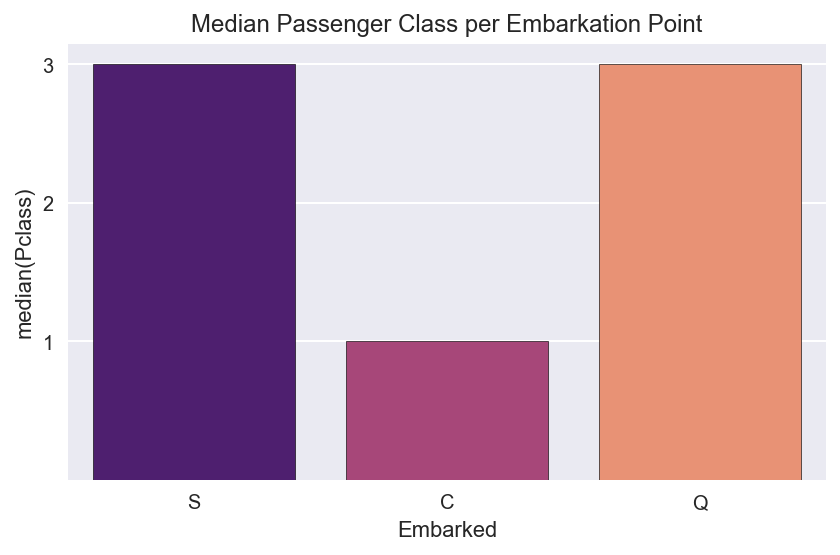

In [42]:
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Pclass', data=total_df, estimator=np.median, ci=None, palette='magma')
plt.title('Median Passenger Class per Embarkation Point')
plt.yticks([1, 2, 3])
plt.tight_layout()

Most people that embarked in Cherbourg went to first class, while on the other two places went to 3rd class.

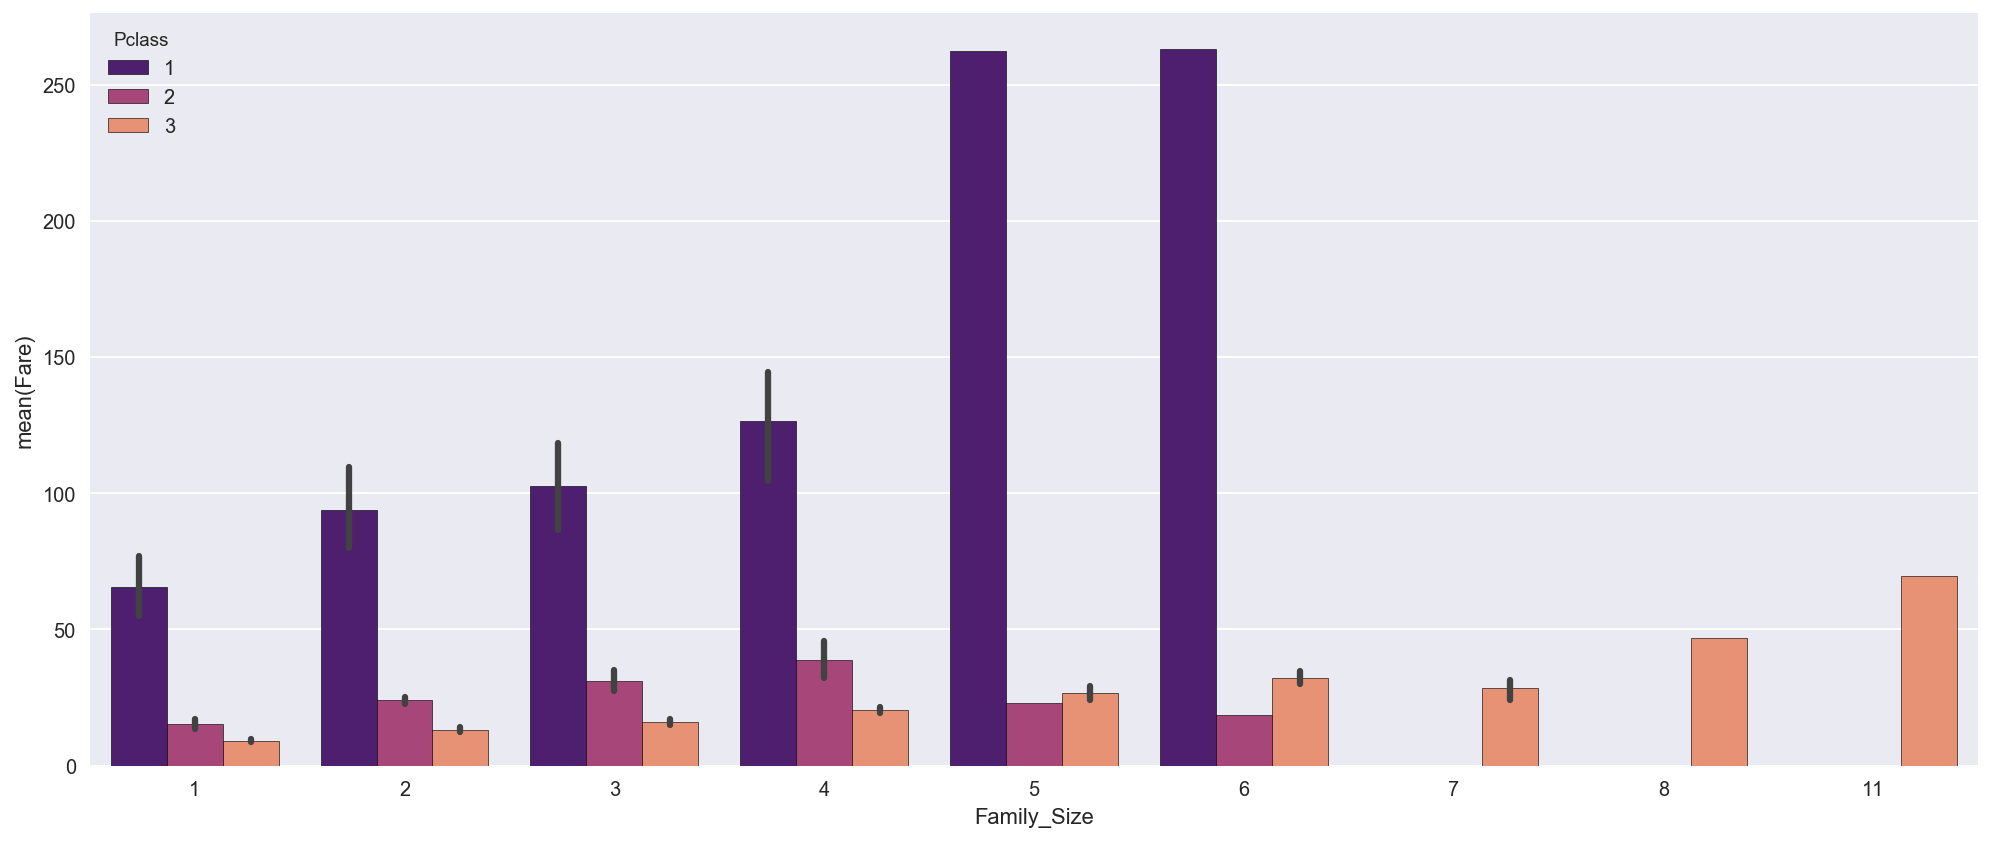

In [43]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Family_Size', y='Fare', hue='Pclass', data=total_df, palette='magma')
plt.tight_layout()

For first and third class it seems that fare increases with Family Size. It might be worth normalizing the fare using the size of family.

In [44]:
total_df['Fare_Family'] = total_df['Fare'] / total_df['Family_Size']

In [46]:
total_df.groupby('Pclass')['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

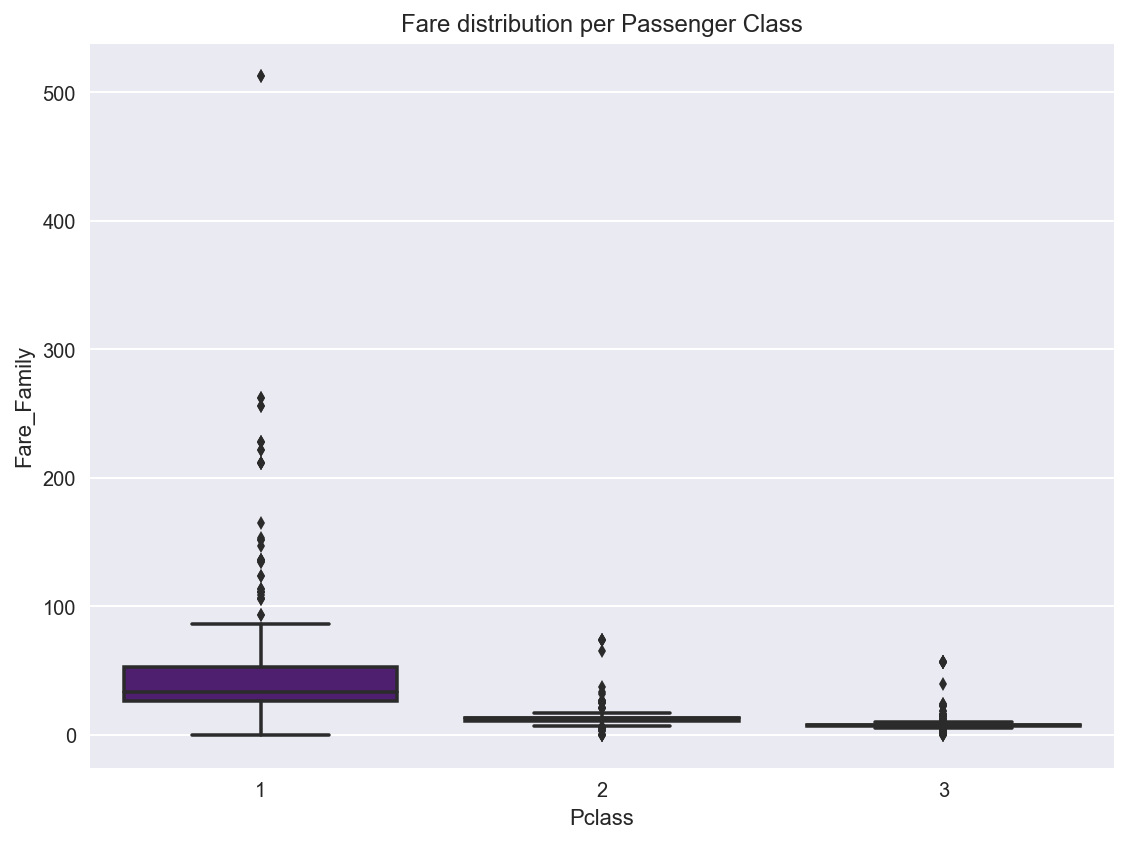

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare_Family', data=total_df, palette='magma')
plt.title('Fare distribution per Passenger Class')
plt.tight_layout()

## Age

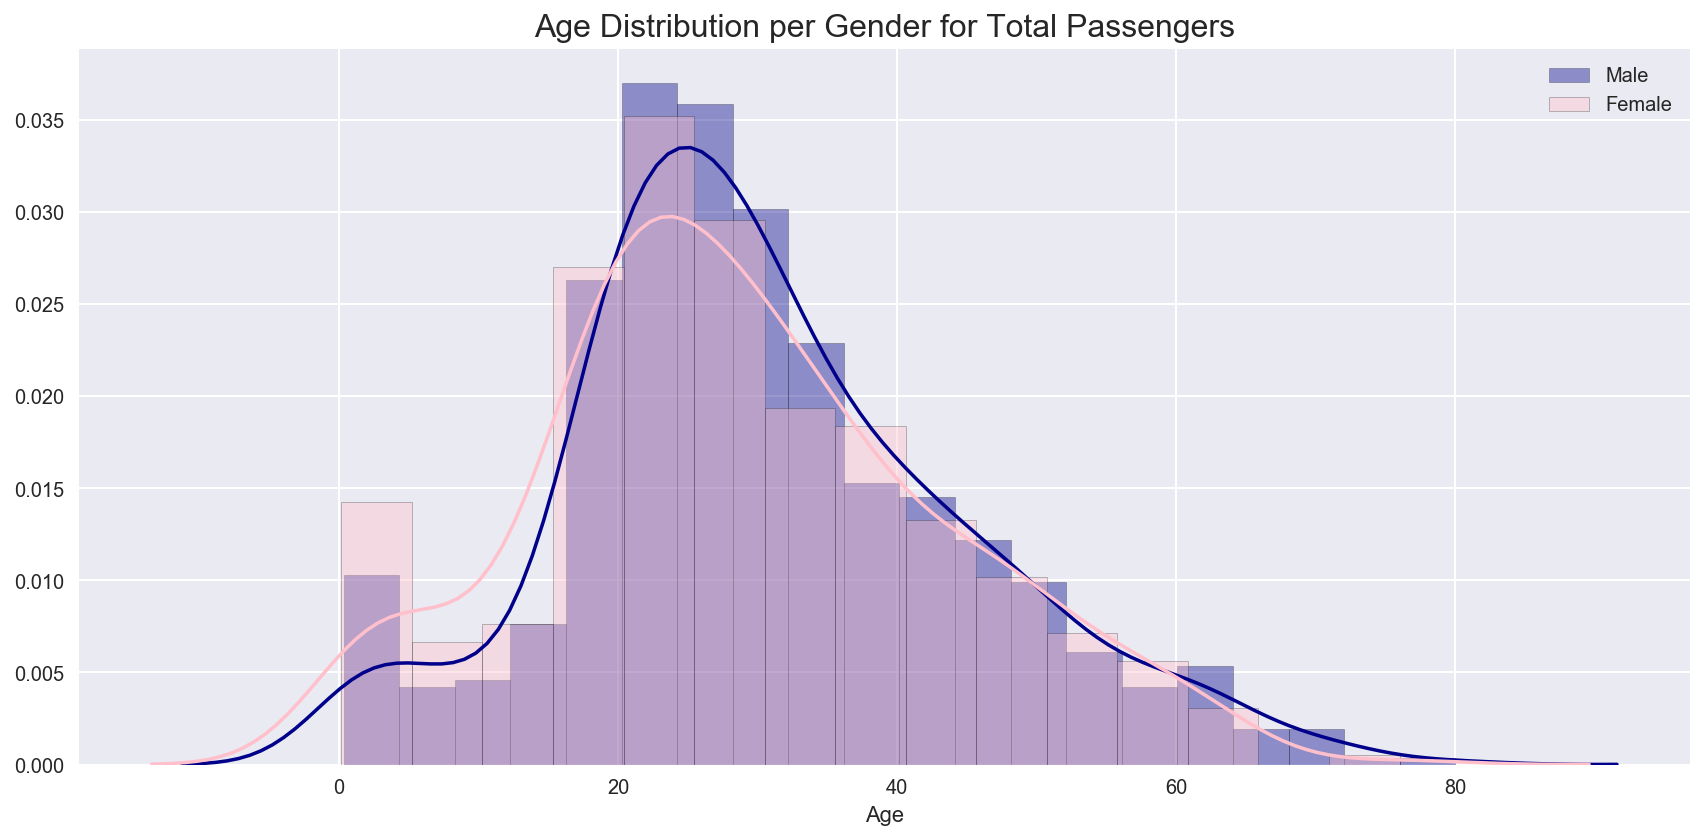

In [49]:
plt.figure(figsize=(12,6))
sns.distplot(total_df[total_df['Sex'] == 'male']['Age'].dropna(), color='darkblue', label='Male')
sns.distplot(total_df[total_df['Sex'] == 'female']['Age'].dropna(), color='pink', label='Female')
plt.title('Age Distribution per Gender for Total Passengers', fontsize=16)
plt.legend()
plt.tight_layout()

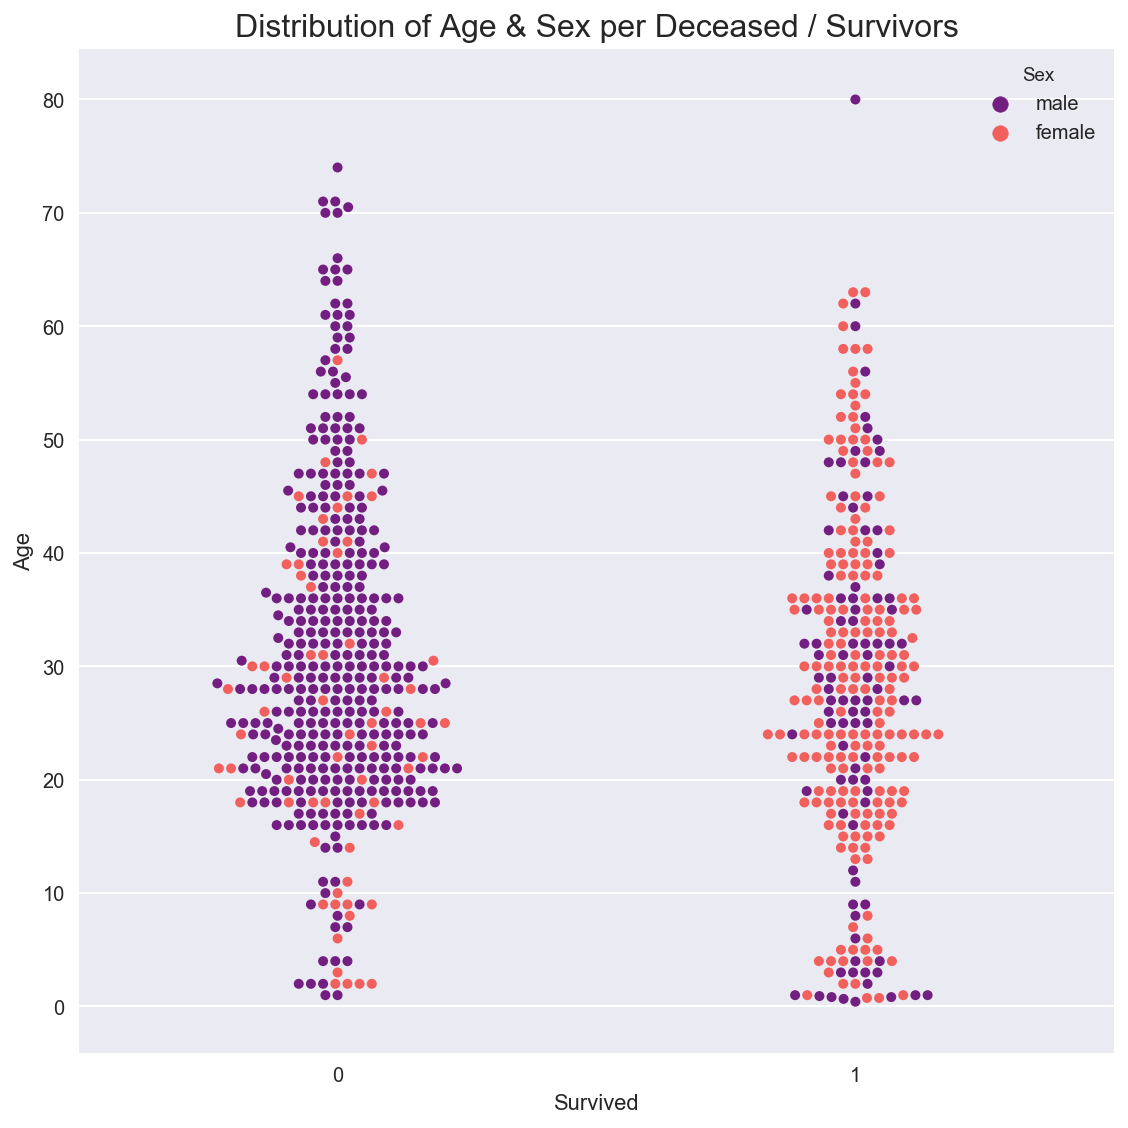

In [50]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='Survived', y='Age', hue='Sex', data=train_df, palette='magma')
plt.title('Distribution of Age & Sex per Deceased / Survivors', fontsize=16)
plt.tight_layout()

Discretize Age in multiple quantiles so that it's easier to check the survival rate per age group.

In [51]:
age_qcut = pd.qcut(train_df['Age'], 25)
age_qcut_df = pd.DataFrame(age_qcut)
age_qcut_df['Survived'] = train_df['Survived']

Very young people have a very good chance of surviving, maybe it is worth separating them from others. Older people also have increased chance of dying.

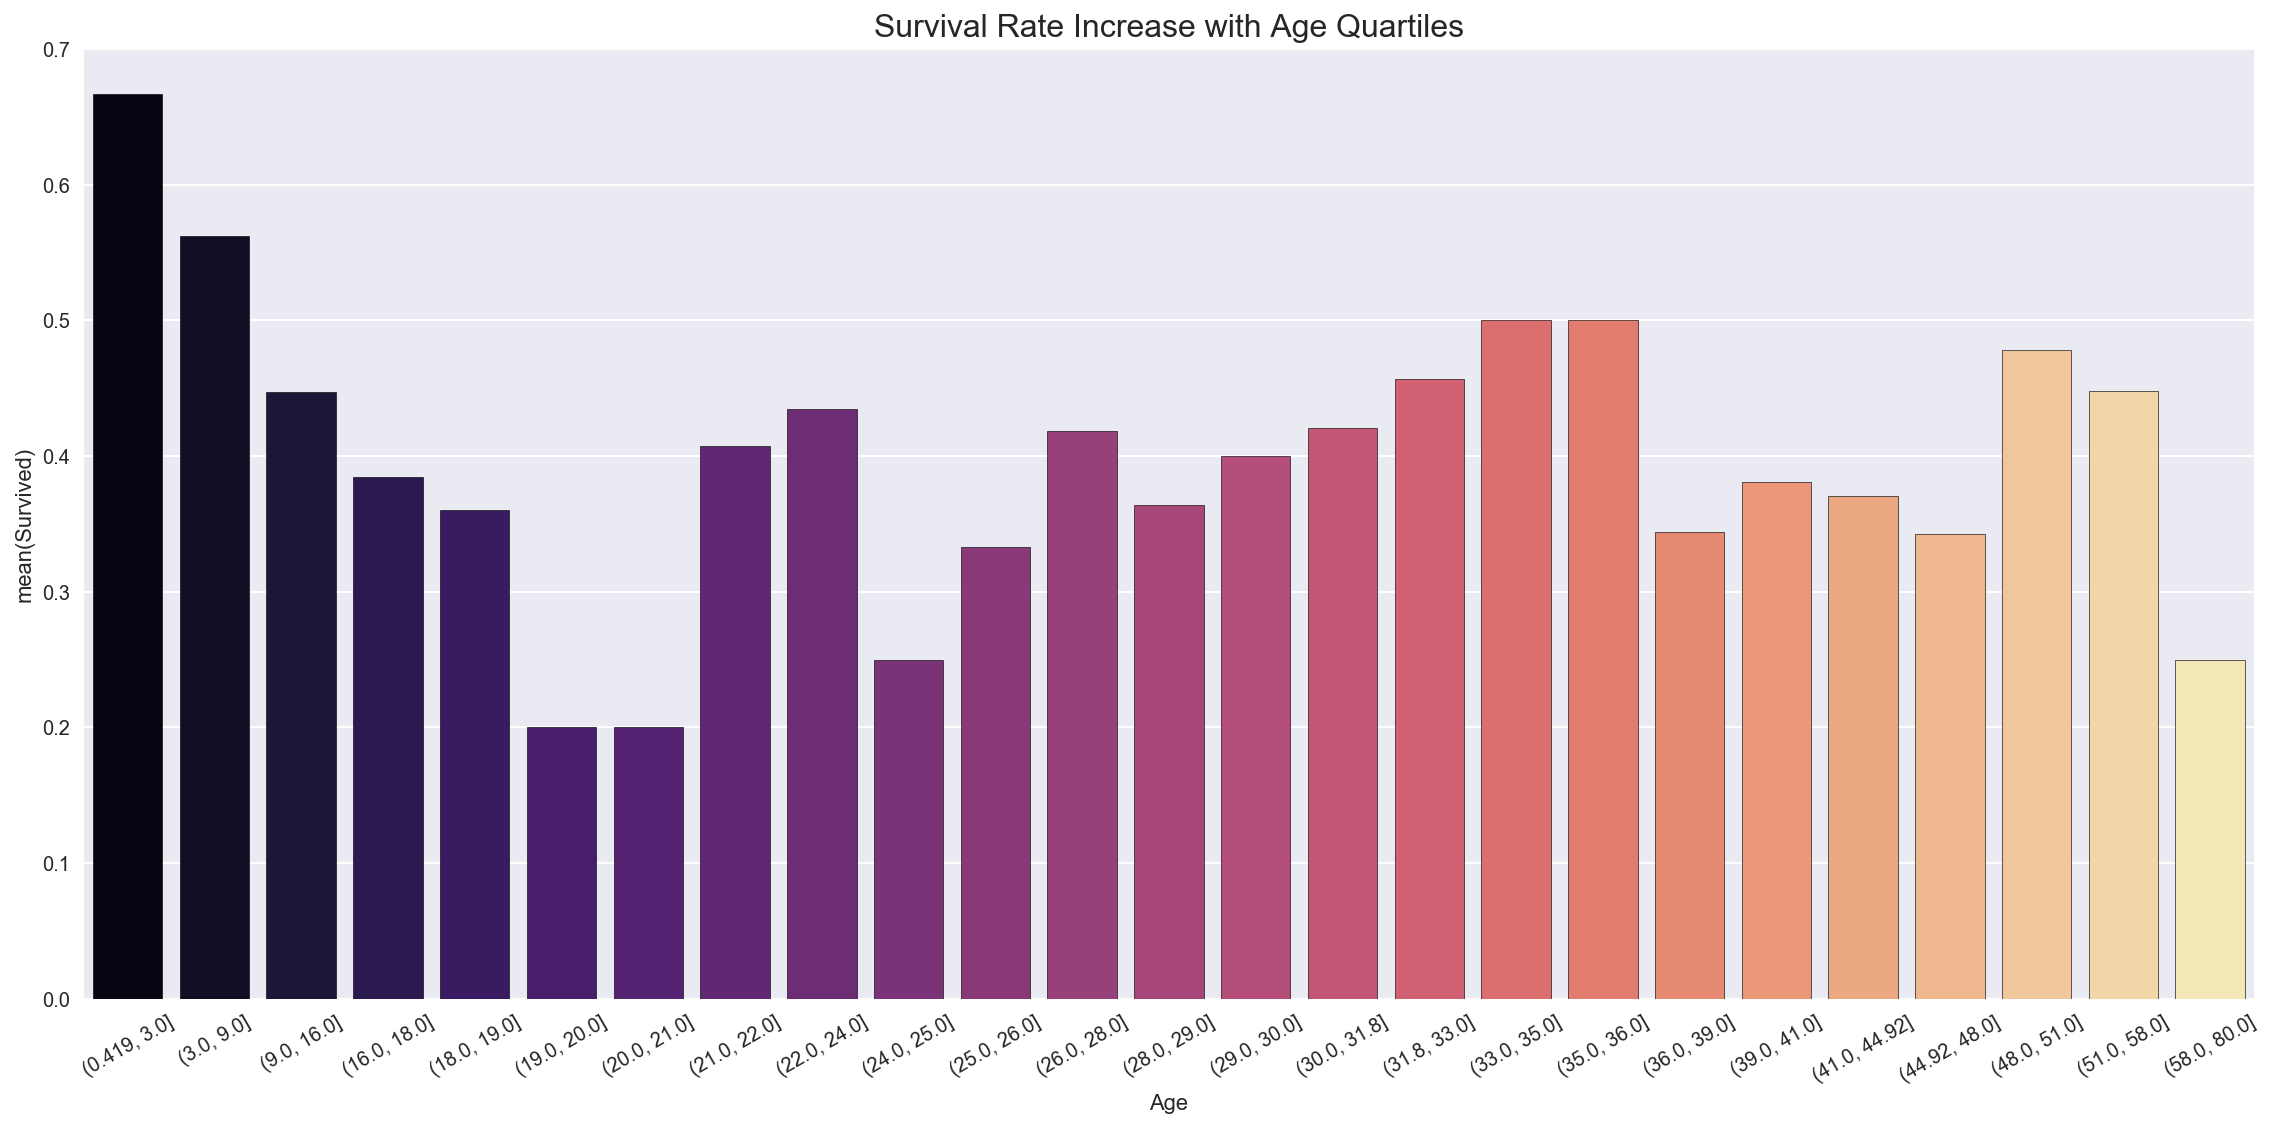

In [52]:
plt.figure(figsize=(16,8))
sns.barplot(x='Age', y='Survived', data=age_qcut_df, ci=None, palette='magma')
plt.title('Survival Rate Increase with Age Quartiles', fontsize=16)
plt.xticks(rotation=30)
plt.tight_layout()

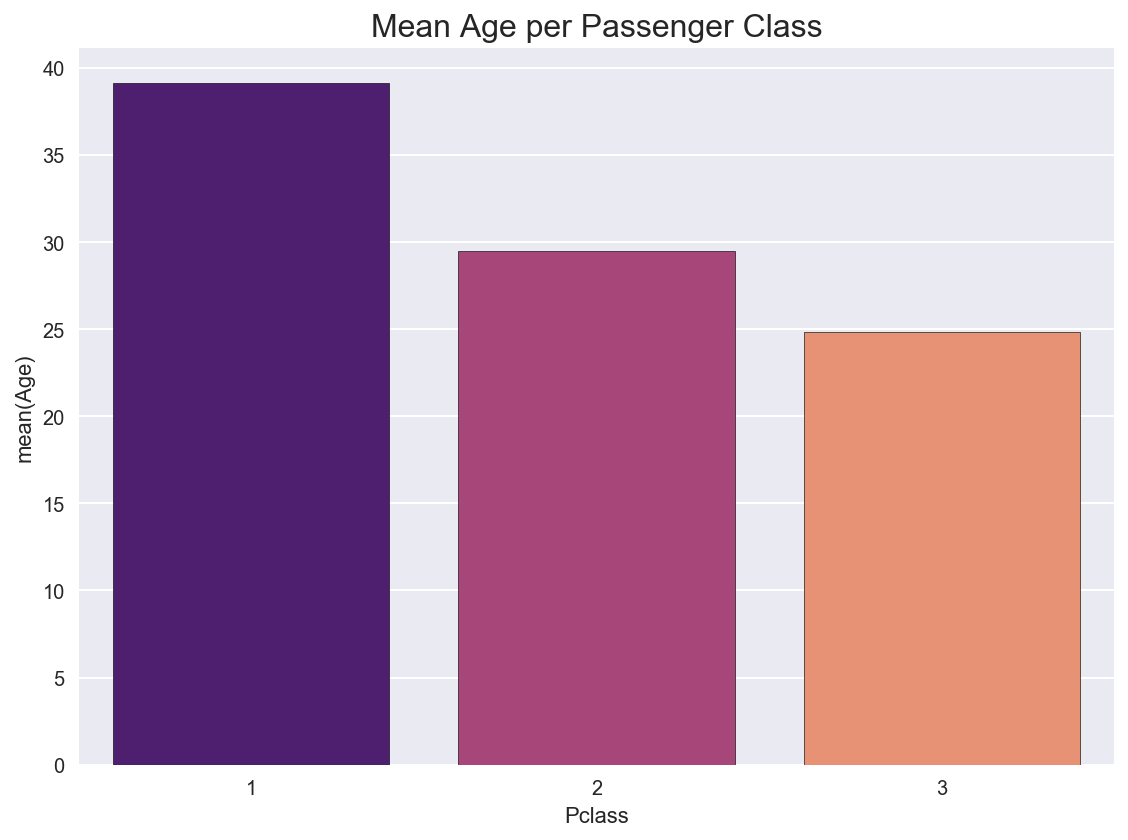

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(x=total_df.groupby('Pclass').Age.mean().index, 
            y=total_df.groupby('Pclass').Age.mean(),
           palette='magma')
plt.title('Mean Age per Passenger Class', fontsize=16)
plt.tight_layout()

The higher the class, the higher the average age.

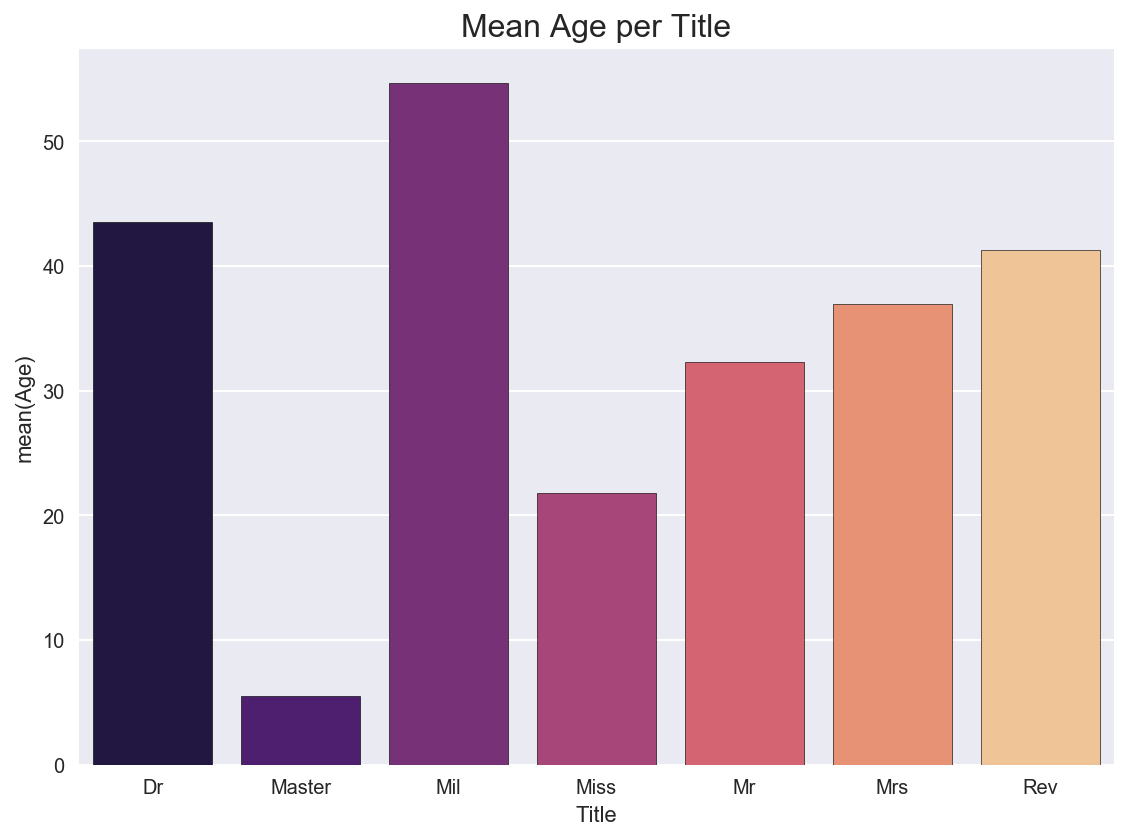

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(x=total_df.groupby('Title').Age.mean().index, 
            y=total_df.groupby('Title').Age.mean(),
           palette='magma')
plt.title('Mean Age per Title', fontsize=16)
plt.tight_layout()

Average age changes substantially with Title. Will use that to imput the missing 263 Age values.

In [55]:
total_df['Age'].isnull().sum()

263

In [56]:
# total_df['Imputed_Age'] = total_df['Age'].fillna(total_df.groupby('Title')['Age'].transform('mean'))

Instead will try predicting Age based on other Features.

In [57]:
from sklearn.ensemble import RandomForestRegressor
# Predicting missing values in age using Random Forest
total_df['Imputed_Age'] = total_df['Age']

#Feature set
age_df = pd.concat([total_df[['Age', 
                              'Fare_Family', 
                              'Family_Size']],
                    sex_df, 
                    pclass_df,
                    title_df, 
                    embarked_df], 
                   axis=1)

# Split sets into train and test
train = age_df.loc[(age_df['Age'].notnull()), :] # known Age values
test = age_df.loc[(age_df['Age'].isnull()), :] # null Ages
    
# All age values are stored in a target array
y = train.values[:, 0]
    
# All the other values are stored in the feature array
X = train.values[:, 1::]

# Create and fit a model
regressor_rf = RandomForestRegressor(n_estimators=300, n_jobs=-1).fit(X, y)

    
# Use the fitted model to predict the missing values
predicted_Ages = regressor_rf.predict(test.values[:, 1::])
    
# Assign those predictions to the full data set

total_df.loc[(total_df['Age'].isnull()), 'Imputed_Age'] = predicted_Ages

Creating new variable **Age_Group** with 4 classes: toddler, child, adult and elder.

In [58]:
total_df['Age_Group'] = total_df['Imputed_Age']
total_df.loc[total_df['Imputed_Age'] <= 5, ['Age_Group']] = 'toddler'
total_df.loc[(total_df['Imputed_Age'] > 5) & (total_df['Imputed_Age'] <= 12), ['Age_Group']] = 'child'
total_df.loc[(total_df['Imputed_Age'] > 12) & (total_df['Imputed_Age'] < 65), ['Age_Group']] = 'adult'
total_df.loc[total_df['Imputed_Age'] >= 65, ['Age_Group']] = 'elder'

In [59]:
age_group_df = pd.get_dummies(total_df['Age_Group'], prefix='Age', drop_first=True)
age_group_df.head()

,Age_child,Age_elder,Age_toddler
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


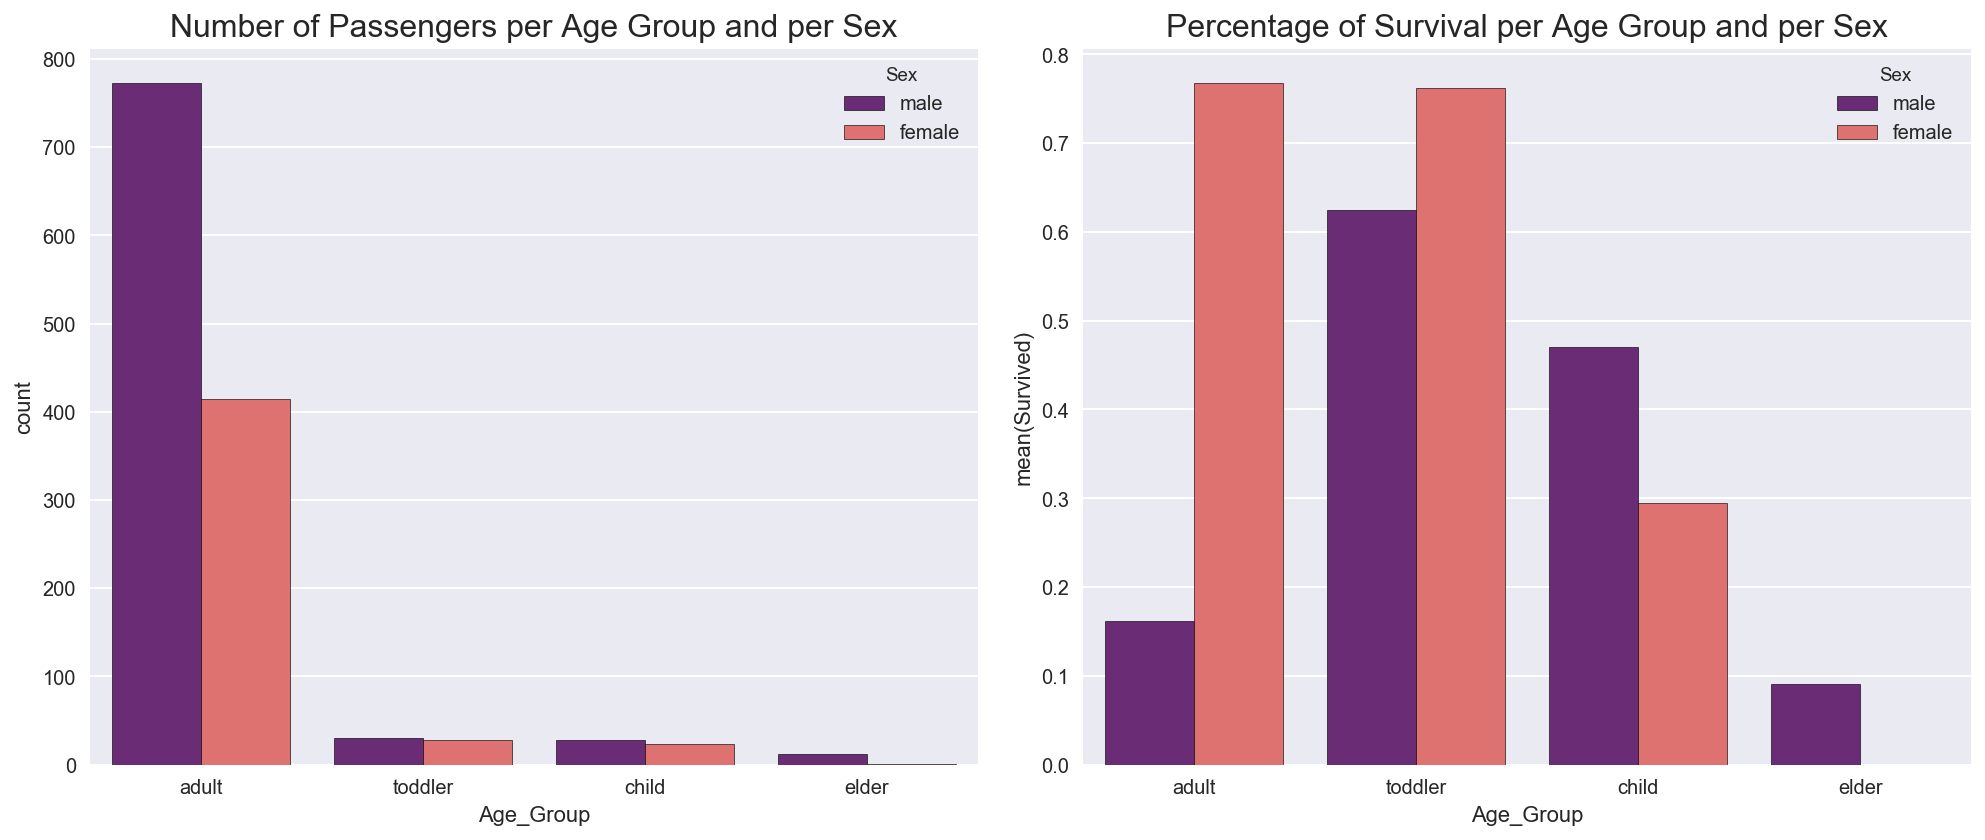

In [60]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot(x='Age_Group', hue='Sex', data=total_df, palette='magma')
plt.title('Number of Passengers per Age Group and per Sex', fontsize=16)

plt.subplot(122)
sns.barplot(x='Age_Group', y='Survived', hue='Sex', data=total_df, ci=None, palette='magma')
plt.title('Percentage of Survival per Age Group and per Sex', fontsize=16)
plt.tight_layout()

In [61]:
total_df.isnull().sum()

Age             263
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
Surname           0
Family_Size       0
Family_ID         0
Fare_Family       0
Imputed_Age       0
Age_Group         0
dtype: int64

## Cabin
Need to extract some information from this. Will extract deck on where cabin is located.

In [62]:
total_df['Deck'] = total_df['Cabin'].apply(lambda x: x[0] if type(x) == str else 'N/A')
total_df['Imputed_Deck'] = total_df['Deck']

In [63]:
total_df['Deck'].value_counts()

N/A    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: Deck, dtype: int64

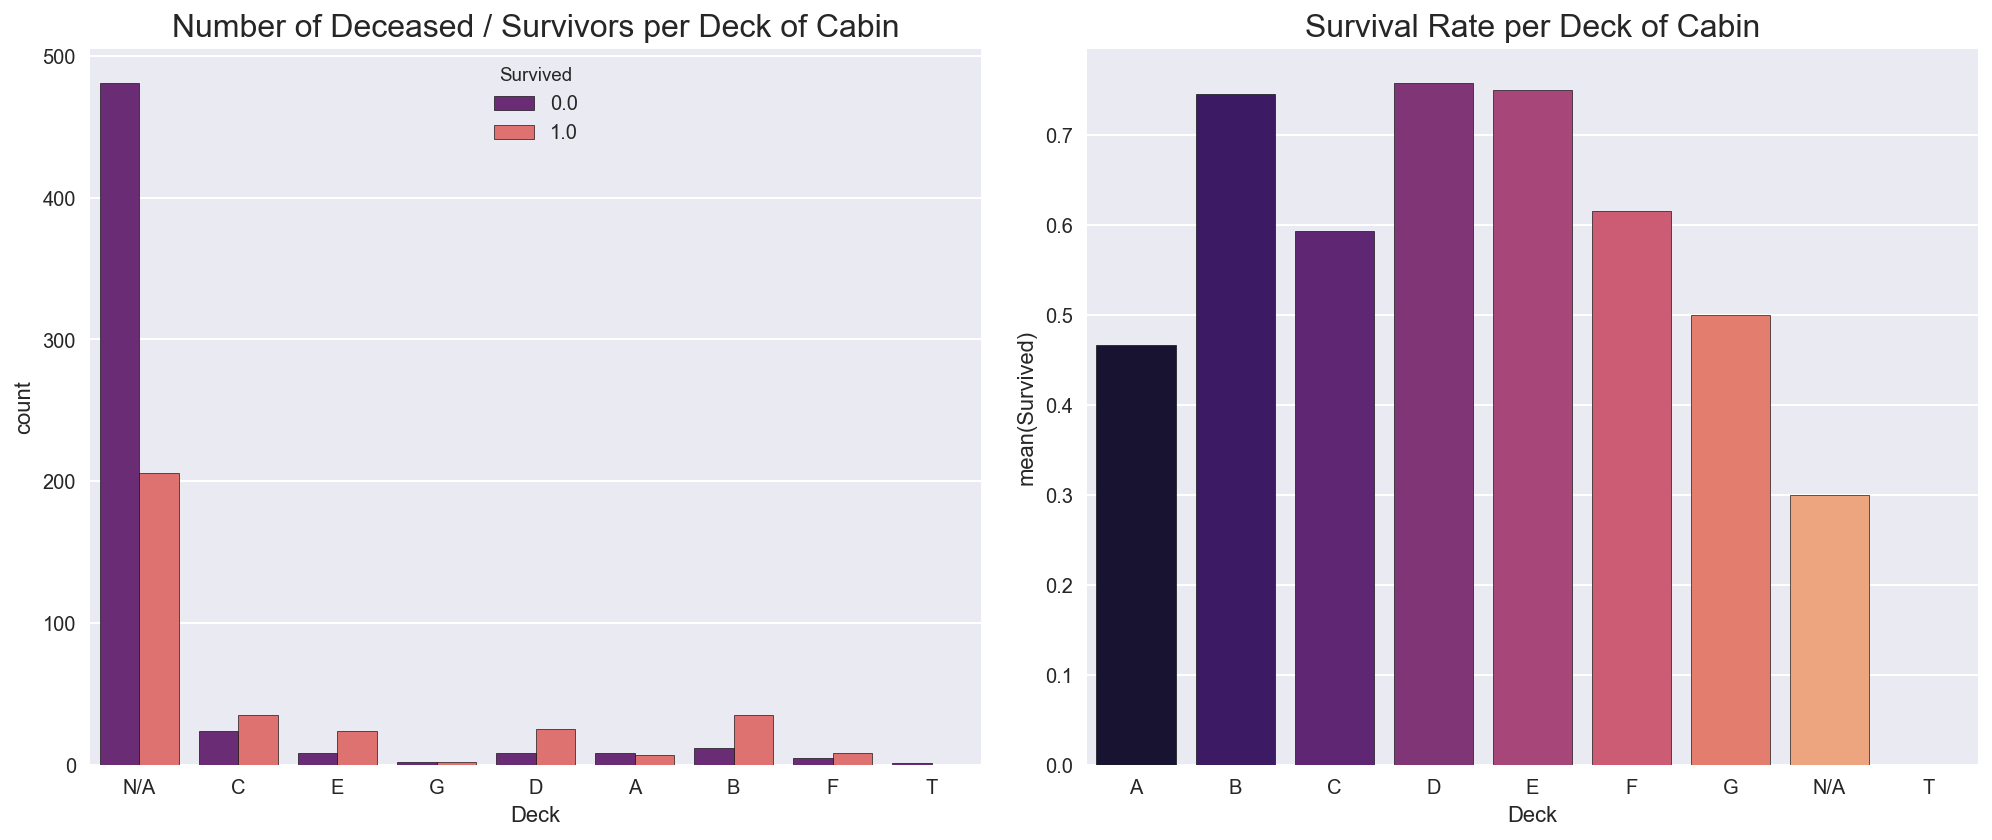

In [64]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot(x='Deck', hue='Survived', data=total_df, palette='magma')
plt.title('Number of Deceased / Survivors per Deck of Cabin', fontsize=16)

plt.subplot(122)
sns.barplot(x=total_df.groupby('Deck').Survived.mean().index, 
            y=total_df.groupby('Deck').Survived.mean(), palette='magma')
plt.title('Survival Rate per Deck of Cabin', fontsize=16)
plt.tight_layout()

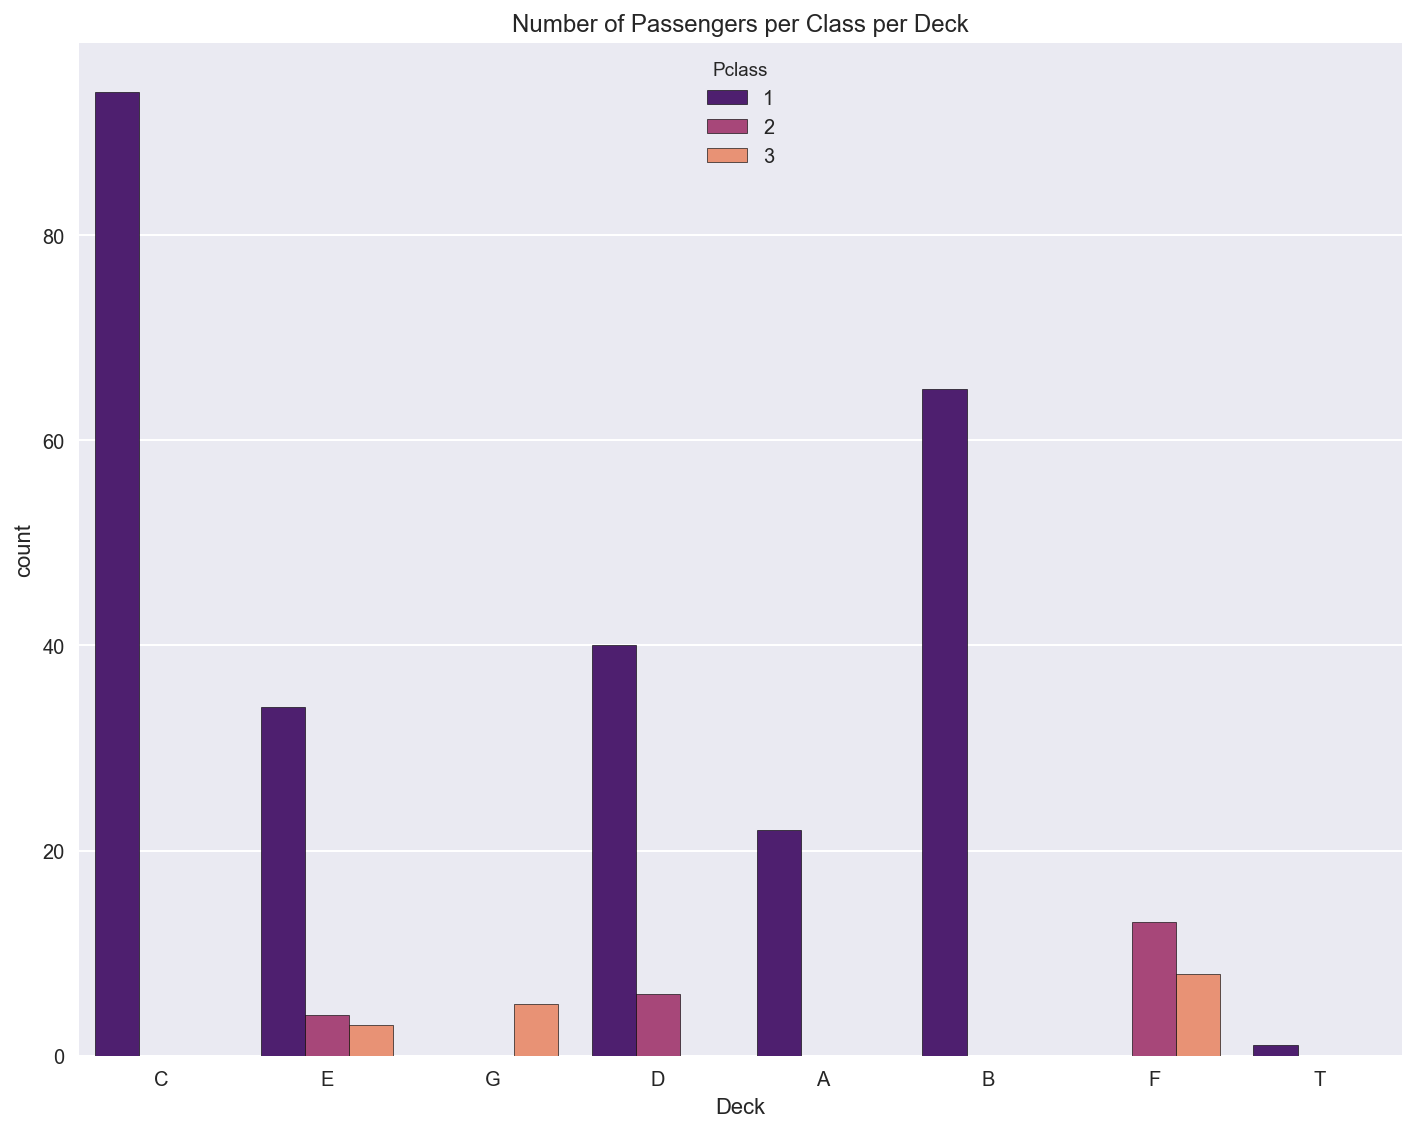

In [65]:
plt.figure(figsize=(10,8))
sns.countplot(x='Deck', hue='Pclass', data=total_df[total_df['Deck'] != 'N/A'], palette='magma')
plt.title('Number of Passengers per Class per Deck')
plt.tight_layout()

In [66]:
from sklearn.ensemble import RandomForestClassifier
#Feature set
deck_df = pd.concat([total_df[['Deck',
                               'Imputed_Age', 
                               'Fare_Family', 
                               'Family_Size']],
                    sex_df, 
                    title_df,
                    pclass_df,
                    title_df, 
                    embarked_df], 
                   axis=1)

# Split sets into train and test
train = deck_df.loc[(deck_df['Deck'] != 'N/A'), :] # known Deck values
test = deck_df.loc[(deck_df['Deck'] == 'N/A'), :] # Deck Unknown

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# All age values are stored in a target array
y = train.values[:, 0]
    
# All the other values are stored in the feature array
X = train.values[:, 1::]

# Create and fit a model
classifier_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1).fit(X, y)

# Use the fitted model to predict the missing values
predicted_Decks = classifier_rf.predict(test.values[:, 1::])
    
# Assign those predictions to the full data set

total_df.loc[(total_df['Deck'] == 'N/A'), 'Imputed_Deck'] = predicted_Decks

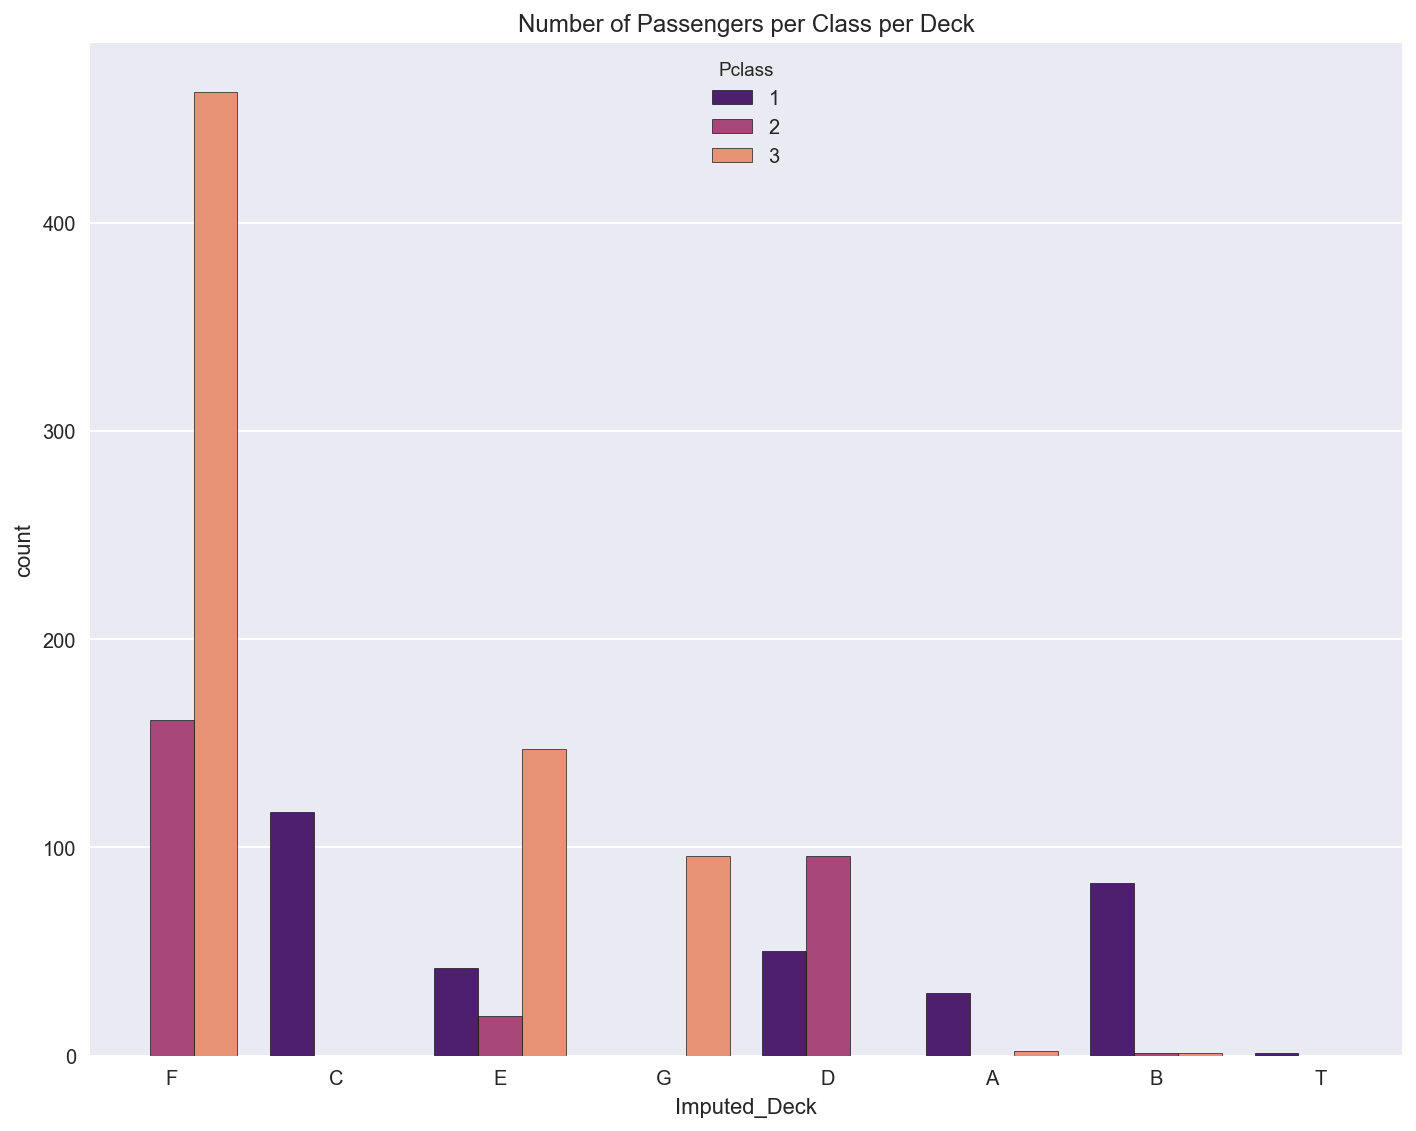

In [67]:
plt.figure(figsize=(10,8))
sns.countplot(x='Imputed_Deck', hue='Pclass', data=total_df, palette='magma')
plt.title('Number of Passengers per Class per Deck')
plt.tight_layout()

Encode Deck Variable.

In [68]:
deck_df = pd.get_dummies(total_df['Imputed_Deck'], prefix='Deck', drop_first=True)
deck_df.head()

,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0


## Ticket
What information can be retrieved from the messy ticket column?

In [69]:
total_df['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

There are two components to the ticket: a prefix and a number. First I will extract the prefix and set those without the prefix to 'N/A'.

In [70]:
total_df['Ticket_Prefix'] = total_df['Ticket'].map(
    lambda t: t.split()[0] if t.split()[0][0].isalpha() else 'N/A')

In [71]:
total_df['Ticket_Prefix'].value_counts().head(10)

N/A           957
PC             92
C.A.           46
SOTON/O.Q.     16
W./C.          14
STON/O         14
CA.            12
A/5            12
SC/PARIS       11
CA             10
Name: Ticket_Prefix, dtype: int64

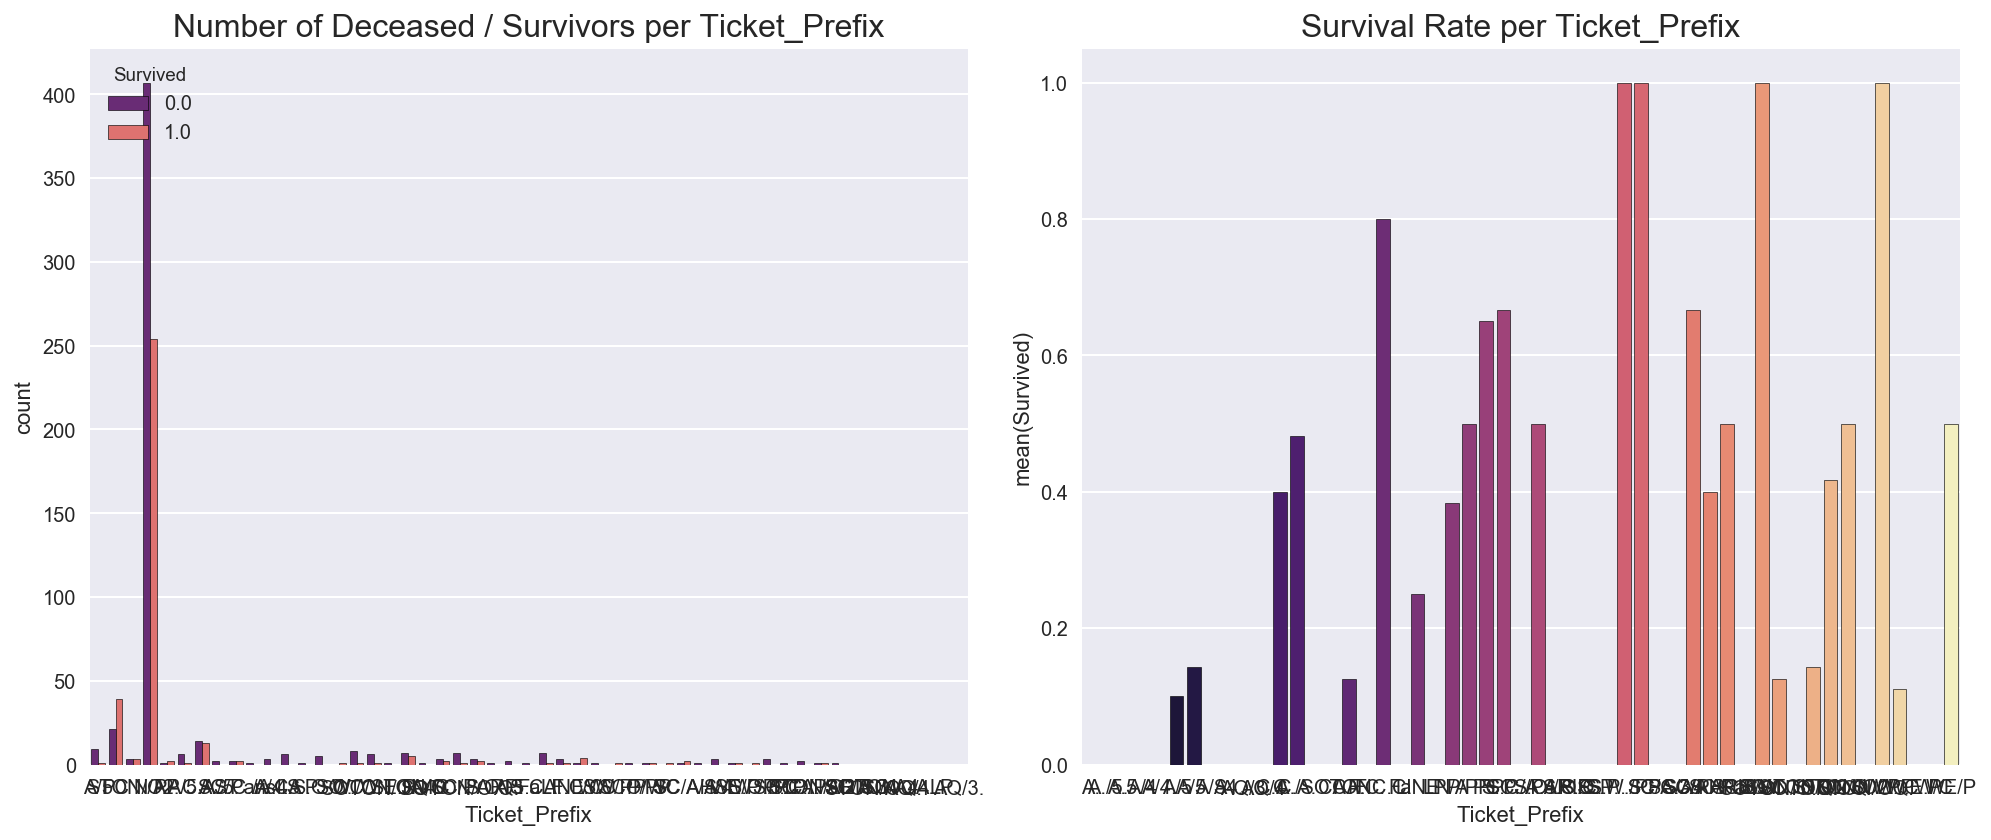

In [72]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot(x='Ticket_Prefix', hue='Survived', data=total_df, palette='magma')
plt.title('Number of Deceased / Survivors per Ticket_Prefix', fontsize=16)

plt.subplot(122)
sns.barplot(x=total_df.groupby('Ticket_Prefix').Survived.mean().index, 
            y=total_df.groupby('Ticket_Prefix').Survived.mean(), palette='magma')
plt.title('Survival Rate per Ticket_Prefix', fontsize=16)
plt.tight_layout()

In [96]:
ticket_prefix_df = pd.get_dummies(total_df['Ticket_Prefix'], prefix='Ticket', drop_first=True)
ticket_prefix_df.head()

,Ticket_A./5.,Ticket_A.5.,Ticket_A/4,Ticket_A/4.,Ticket_A/5,Ticket_A/5.,Ticket_A/S,Ticket_A4.,Ticket_AQ/3.,Ticket_AQ/4,Ticket_C,Ticket_C.A.,Ticket_C.A./SOTON,Ticket_CA,Ticket_CA.,Ticket_F.C.,Ticket_F.C.C.,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_N/A,Ticket_P/PP,Ticket_PC,Ticket_PP,Ticket_S.C./A.4.,Ticket_S.C./PARIS,Ticket_S.O./P.P.,Ticket_S.O.C.,Ticket_S.O.P.,Ticket_S.P.,Ticket_S.W./PP,Ticket_SC,Ticket_SC/A.3,Ticket_SC/A4,Ticket_SC/AH,Ticket_SC/PARIS,Ticket_SC/Paris,Ticket_SCO/W,Ticket_SO/C,Ticket_SOTON/O.Q.,Ticket_SOTON/O2,Ticket_SOTON/OQ,Ticket_STON/O,Ticket_STON/O2.,Ticket_STON/OQ.,Ticket_SW/PP,Ticket_W./C.,Ticket_W.E.P.,Ticket_W/C,Ticket_WE/P
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And now the number. Instead of taking the number itself, which is likely to hold little information, I will take the number of digits of the number.

In [74]:
total_df['Ticket_NumberOfDigits'] = total_df['Ticket'].map(
    lambda t: len(t.split()[0]) if t.split()[0].isdigit() else len(t.split()[-1]))
total_df['Ticket_NumberOfDigits'].value_counts()

6    606
5    377
4    249
7     60
3     13
1      4
Name: Ticket_NumberOfDigits, dtype: int64

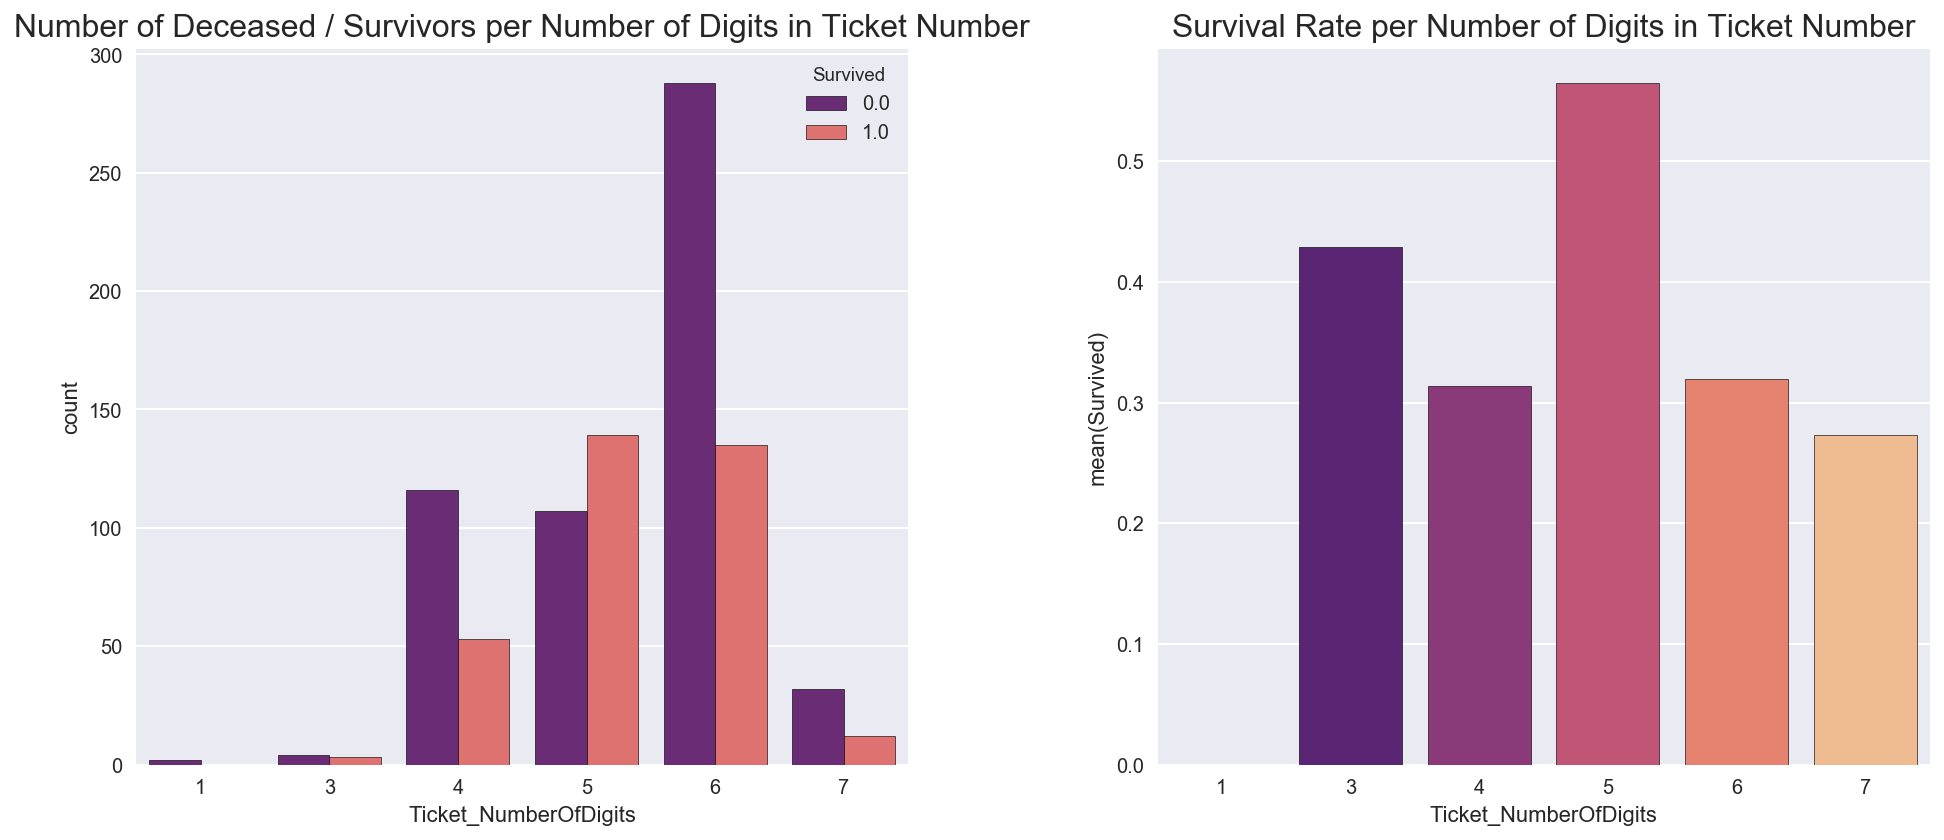

In [75]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot(x='Ticket_NumberOfDigits', hue='Survived', data=total_df, palette='magma')
plt.title('Number of Deceased / Survivors per Number of Digits in Ticket Number', fontsize=16)

plt.subplot(122)
sns.barplot(x=total_df.groupby('Ticket_NumberOfDigits').Survived.mean().index, 
            y=total_df.groupby('Ticket_NumberOfDigits').Survived.mean(), palette='magma')
plt.title('Survival Rate per Number of Digits in Ticket Number', fontsize=16)
plt.tight_layout()

One-way ANOVA indicates that there are significative differences between people on tickets with different number of digits.

In [90]:
_, p_value = f_oneway(
             train_df[total_df['Ticket_NumberOfDigits'] == 1]['Survived'], 
             train_df[total_df['Ticket_NumberOfDigits'] == 3]['Survived'],
             train_df[total_df['Ticket_NumberOfDigits'] == 4]['Survived'],
             train_df[total_df['Ticket_NumberOfDigits'] == 5]['Survived'],
             train_df[total_df['Ticket_NumberOfDigits'] == 6]['Survived'],
             train_df[total_df['Ticket_NumberOfDigits'] == 7]['Survived'])
print('The p-value of the difference of the variable Survived in relation with \
Ticket_NumberOfDigits is:\n{}'.format(p_value))

The p-value of the difference of the variable Survived in relation with Ticket_NumberOfDigits is:
1.4564590577219393e-09


/Users/hugobmachado/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hugobmachado/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hugobmachado/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/hugobmachado/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/hugobmachado/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/hugobmachado/anaconda/lib/python3.6/site-packages/ipykernel

In [97]:
ticket_NoD_df = pd.get_dummies(total_df['Ticket_NumberOfDigits'], prefix='Ticket_NoD', drop_first=True)
ticket_NoD_df.head()

,Ticket_NoD_3,Ticket_NoD_4,Ticket_NoD_5,Ticket_NoD_6,Ticket_NoD_7
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0


In [98]:
total_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Surname,Family_Size,Family_ID,Fare_Family,Imputed_Age,Age_Group,Deck,Imputed_Deck,Ticket_Prefix,Ticket_NumberOfDigits
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,Braund,2,Small,3.62500,22.0,adult,N/A,F,A/5,5
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,Cumings,2,Small,35.64165,38.0,adult,C,C,PC,5
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,Heikkinen,1,Small,7.92500,26.0,adult,N/A,F,STON/O2.,7
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,Futrelle,2,Small,26.55000,35.0,adult,C,C,N/A,6
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,Allen,1,Small,8.05000,35.0,adult,N/A,E,N/A,6
